<a href="https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Qwen3_(4B)-GRPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your own computer, follow the installation instructions on our Github page [here](https://docs.unsloth.ai/get-started/installing-+-updating).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save)


### News

Read our **[Qwen3 Guide](https://docs.unsloth.ai/basics/qwen3-how-to-run-and-fine-tune)** and check out our new **[Dynamic 2.0](https://docs.unsloth.ai/basics/unsloth-dynamic-2.0-ggufs)** quants which outperforms other quantization methods!

Visit our docs for all our [model uploads](https://docs.unsloth.ai/get-started/all-our-models) and [notebooks](https://docs.unsloth.ai/get-started/unsloth-notebooks).


### Installation

### Unsloth

Goal: To convert `Qwen3-4B-Base` into a reasoning model via GRPO by using OpenR1's Math dataset.

We first pre fine-tune the model to make GRPO skip trying to match formatting - this speeds GRPO up.

In [1]:
# import torch
# import os
# import random

# num_gpus = torch.cuda.device_count()
# if num_gpus > 0:
#     chosen_gpu = random.randint(0, num_gpus - 1)
#     os.environ["CUDA_VISIBLE_DEVICES"] = str(chosen_gpu)
#     print(f"Randomly selected GPU: {chosen_gpu}")
# else:
#     print("No GPUs available.")


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 1024 # Can increase for longer reasoning traces
lora_rank = 8 # Larger rank = smarter, but slower

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Qwen3-4B-Base",
    max_seq_length = max_seq_length,
    load_in_4bit = True, # False for LoRA 16bit
    fast_inference = True, # Enable vLLM fast inference
    max_lora_rank = lora_rank,
    gpu_memory_utilization = 0.4, # Reduce if out of memory
)

model = FastLanguageModel.get_peft_model(
    model,
    r = lora_rank, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = [
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj",
    ],
    lora_alpha = lora_rank*2, # *2 speeds up training
    use_gradient_checkpointing = "unsloth", # Reduces memory usage
    random_state = 3407,
)


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
INFO 07-22 20:16:36 [importing.py:53] Triton module has been replaced with a placeholder.
INFO 07-22 20:16:36 [__init__.py:239] Automatically detected platform cuda.
Unsloth: Patching vLLM v1 graph capture
Unsloth: Patching vLLM v0 graph capture
==((====))==  Unsloth 2025.7.7: Fast Qwen3 patching. Transformers: 4.51.3. vLLM: 0.8.5.post1.
   \\   /|    NVIDIA GeForce RTX 4090. Num GPUs = 1. Max memory: 23.546 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: vLLM loading unsloth/qwen3-4b-base-unsloth-bnb-4bit with actual GPU utilization = 19.64%
Unsloth: Your GPU has CUDA co

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 07-22 20:16:47 [punica_selector.py:18] Using PunicaWrapperGPU.
INFO 07-22 20:16:47 [gpu_model_runner.py:1347] Model loading took 3.1446 GiB and 1.577060 seconds
INFO 07-22 20:16:58 [backends.py:420] Using cache directory: /mnt/data/amit/.cache/vllm/torch_compile_cache/b48e293b44/rank_0_0 for vLLM's torch.compile
INFO 07-22 20:16:58 [backends.py:430] Dynamo bytecode transform time: 10.59 s
INFO 07-22 20:17:06 [backends.py:118] Directly load the compiled graph(s) for shape None from the cache, took 6.889 s
INFO 07-22 20:17:08 [monitor.py:33] torch.compile takes 10.59 s in total
INFO 07-22 20:17:09 [kv_cache_utils.py:634] GPU KV cache size: 1,792 tokens
INFO 07-22 20:17:09 [kv_cache_utils.py:637] Maximum concurrency for 1,024 tokens per request: 1.75x
INFO 07-22 20:17:09 [vllm_utils.py:641] Unsloth: Running patched vLLM v1 `capture_model`.
INFO 07-22 20:17:30 [gpu_model_runner.py:1686] Graph capturing finished in 21 secs, took 1.51 GiB
INFO 07-22 20:17:30 [vllm_utils.py:648] Unsloth:

Unsloth 2025.7.7 patched 36 layers with 36 QKV layers, 36 O layers and 36 MLP layers.


### GRPO chat template
Since we're using a base model, we should set a chat template. You can make your own chat template as well!
1. DeepSeek uses `<think>` and `</think>`, but this is **not** necessary - you can customize it however you like!
2. A `system_prompt` is recommended to at least guide the model's responses.

In [4]:
reasoning_start = "<REASONING>"
reasoning_end = "</REASONING>"
solution_start = "<CONTROLS>"
solution_end = "</CONTROLS>"

# Time settings - these can be changed by the user before generating a dataset
# For example, to aim for 50 steps in 5 seconds:
# dt = 0.1
# steps = 50
# Or for 20 steps in 10 seconds:
# dt = 0.5
# steps = 20

# Default values (can be overridden before running generation)
dt = 0.1  # Default time step duration
steps = 50 # Default number of steps


def get_system_prompt(current_dt, current_steps, system_type="double_integrator"):
    total_time = current_dt * current_steps
    
    if system_type == "double_integrator":
        return f"""You are a control systems expert.
Given a double integrator system (ẍ = u) with initial position and velocity,
generate a sequence of {current_steps} control inputs to reach the origin (0,0) in exactly {total_time:.2f} seconds.
Position and velocity must stay within [-1, 1], and control inputs must be within [-3, 3].
Explain your approach between {reasoning_start} and {reasoning_end}.
Then provide exactly {current_steps} control values as a comma-separated list between {solution_start} and {solution_end}."""
    
    elif system_type == "van_der_pol":
        return f"""You are a control systems expert.
Given a Van der Pol oscillator system (ẍ - μ(1-x²)ẋ + x = u) with μ=1, initial position and velocity,
generate a sequence of {current_steps} control inputs to reach the origin (0,0) in exactly {total_time:.2f} seconds.
Position and velocity must stay within [-2, 2], and control inputs must be within [-5, 5].
Explain your approach between {reasoning_start} and {reasoning_end}.
Then provide exactly {current_steps} control values as a comma-separated list between {solution_start} and {solution_end}."""

# Initialize global system_prompt with double integrator as default
system_prompt = get_system_prompt(dt, steps, "double_integrator")


We create a simple chat template below. Notice `add_generation_prompt` includes prepending `<start_working_out>` to guide the model to start its reasoning process.

In [5]:
chat_template = \
    "{% if messages[0]['role'] == 'system' %}"\
        "{{ messages[0]['content'] + eos_token }}"\
        "{% set loop_messages = messages[1:] %}"\
    "{% else %}"\
        "{{ '{system_prompt}' + eos_token }}"\
        "{% set loop_messages = messages %}"\
    "{% endif %}"\
    "{% for message in loop_messages %}"\
        "{% if message['role'] == 'user' %}"\
            "{{ message['content'] }}"\
        "{% elif message['role'] == 'assistant' %}"\
            "{{ message['content'] + eos_token }}"\
        "{% endif %}"\
    "{% endfor %}"\
    "{% if add_generation_prompt %}{{ '{reasoning_start}' }}"\
    "{% endif %}"

# Replace with out specific template:
chat_template = chat_template\
    .replace("'{system_prompt}'",   f"'{system_prompt}'")\
    .replace("'{reasoning_start}'", f"'{reasoning_start}'")
tokenizer.chat_template = chat_template

Let's see how our chat template behaves on an example:

In [6]:
# tokenizer.apply_chat_template([
#     {"role" : "user", "content" : "What is 1+1?"},
#     {"role" : "assistant", "content" : f"{reasoning_start}I think it's 2.{reasoning_end}{solution_start}2{solution_end}"},
#     {"role" : "user", "content" : "What is 2+2?"},
# ], tokenize = False, add_generation_prompt = True)

### Pre fine-tuning for formatting
We now use a subset of NVIDIA's [Open Math Reasoning dataset](https://huggingface.co/datasets/nvidia/OpenMathReasoning) which was filtered to only include high quality DeepSeek R1 traces.

We'll only filter ~59 or so examples to first "prime" / pre fine-tune the model to understand our custom GRPO formatting.

We have to format the dataset to follow our GRPO style formatting:

In [7]:
import numpy as np
import re # Import re for parsing in evaluate_control_sequence

def generate_simple_control_dataset(num_samples=500, target_dt=0.1, target_steps=50):
    """Generate double integrator control problems with LQR solutions for specific dt and steps."""
    data = []
    total_time_sec = target_dt * target_steps
    sample_system_prompt = get_system_prompt(target_dt, target_steps)
    
    for i in range(num_samples):
        # Random initial states within bounds
        x0 = np.random.uniform(-0.8, 0.8)
        v0 = np.random.uniform(-0.8, 0.8)
        
        # Problem statement
        problem = f"Control a double integrator system with initial state [position={x0:.2f}, velocity={v0:.2f}] to reach the origin (0,0) in {total_time_sec:.2f} seconds using {target_steps} steps. Ensure all states remain within [-1,1] and controls within [-3,3]."
        
        # Solve for optimal control sequence using LQR
        control_inputs = solve_double_integrator(x0, v0, target_dt, target_steps)
        
        # Generate reasoning text with LQR explanation
        reasoning = f"""For the double integrator system starting at position {x0:.2f} and velocity {v0:.2f}, I'll apply Linear Quadratic Regulator (LQR) control to reach the origin optimally in {total_time_sec:.2f} seconds using {target_steps} steps.

        The LQR approach provides an optimal feedback control law by minimizing a quadratic cost function that balances:
        1. The error in state (position and velocity)
        2. The control effort used

        For a double integrator with dynamics:
        - ẋ = v
        - v̇ = u

        The discrete-time state-space representation is:
        - x(k+1) = Ax(k) + Bu(k)

        Where:
        - A = [[1, Δt], [0, 1]]
        - B = [[0.5(Δt)², Δt]]
        - Δt = {target_dt:.2f} seconds

        Computing the optimal gain matrix K through the Riccati equation gives a feedback law u = -Kx.
        This produces a smooth control sequence that brings the system to the origin while respecting constraints.

        The resulting {target_steps} control inputs applied over {total_time_sec:.2f} seconds will optimally control the system to the target state."""
        # Format reasoning text        
        # Format control values
        control_str = ", ".join([f"{u:.3f}" for u in control_inputs])
        
        # Create output
        complete_output = f"{reasoning_start}{reasoning}{reasoning_end}{solution_start}{control_str}{solution_end}"
        
        # Add to dataset
        data.append({
            "prompt": [
                {"role": "system", "content": sample_system_prompt}, # Use sample-specific system prompt
                {"role": "user", "content": problem}
            ],
            "answer": control_str,
            "Messages": [
                {"role": "system", "content": sample_system_prompt}, # Use sample-specific system prompt
                {"role": "user", "content": problem},
                {"role": "assistant", "content": complete_output}
            ]
        })
    
    return data


def solve_double_integrator(x0, v0, dt, steps):
    """
    Compute LQR optimal control sequence for the double integrator.
    """
    import numpy as np
    import scipy.linalg as la
    
    # System dynamics for double integrator in discrete time
    A = np.array([[1, dt], 
                 [0, 1]])
    
    B = np.array([[0.5*dt**2], 
                 [dt]])
    
    # Cost matrices
    Q = np.diag([10.0, 10.0])  # State cost: position error more important than velocity
    R = np.array([[0.1]])   # Control cost (small to allow sufficient control)
    
    # Solve discrete time algebraic Riccati equation
    P = la.solve_discrete_are(A, B, Q, R)
    
    # Compute optimal feedback gain
    K = np.linalg.inv(R + B.T @ P @ B) @ B.T @ P @ A
    
    # Initial state
    x = np.array([[x0], [v0]])
    
    # Simulate the closed loop system and get control sequence
    controls = []
    states = [x.copy()]
    
    for i in range(steps):
        # Compute optimal control: u = -K*x
        u = -K @ x
        
        # Clamp control within bounds
        u_clamped = max(-3.0, min(3.0, float(u[0])))
        
        # Apply control to system
        x = A @ x + B * u_clamped
        
        # Clamp states if needed (though LQR should respect constraints if tuned well)
        x[0,0] = max(-1.0, min(1.0, x[0,0]))  # Position
        x[1,0] = max(-1.0, min(1.0, x[1,0]))  # Velocity
        
        # Save control and state
        controls.append(u_clamped)
        states.append(x.copy())
    
    return controls


def solve_van_der_pol(x0, v0, mu=1.0, dt=0.1, steps=50):
    """
    Compute control sequence for the Van der Pol oscillator using numerical optimization.
    """
    import numpy as np
    from scipy.integrate import solve_ivp
    import scipy.optimize as opt
    
    # Define Van der Pol dynamics with control
    def van_der_pol_dynamics(t, state, u):
        x, v = state
        dxdt = v
        dvdt = mu * (1 - x**2) * v - x + u
        return [dxdt, dvdt]
    
    # Define cost function for optimization
    def cost_function(u_sequence):
        # Initialize state
        state = [x0, v0]
        states = [state.copy()]
        total_cost = 0
        
        # Simulate forward with these controls
        for i, u in enumerate(u_sequence):
            # Bound control
            u = max(-5.0, min(5.0, u))
            
            # Simulate one step
            sol = solve_ivp(
                lambda t, y: van_der_pol_dynamics(t, y, u), 
                [0, dt], state, method='RK45', t_eval=[dt]
            )
            state = sol.y[:, -1].tolist()
            states.append(state.copy())
            
            # Compute step cost (quadratic state and control costs)
            state_cost = 10.0 * state[0]**2 + 5.0 * state[1]**2
            control_cost = 0.1 * u**2
            
            # Higher weight for final states
            time_weight = 1.0 if i < steps-5 else 5.0
            step_cost = time_weight * (state_cost + control_cost)
            total_cost += step_cost
        
        # Extra penalty for final state not being at origin
        final_x, final_v = states[-1]
        final_cost = 50.0 * (final_x**2 + final_v**2)
        
        return total_cost + final_cost
    
    # Optimize control sequence
    initial_guess = np.zeros(steps)
    bounds = [(-5, 5)] * steps
    
    result = opt.minimize(
        cost_function, 
        initial_guess, 
        method='SLSQP', 
        bounds=bounds,
        options={'maxiter': 500}
    )
    
    # Return optimal control sequence
    controls = np.clip(result.x, -5.0, 5.0).tolist()
    return controls

In [8]:
# def visualize_lqr_solution(x0, v0, dt, steps):
#     """Visualize an LQR solution for a specific initial state."""
#     import matplotlib.pyplot as plt
    
#     controls = solve_double_integrator(x0, v0, dt, steps)
    
#     # Simulate trajectory
#     x, v = x0, v0
#     positions = [x]
#     velocities = [v]
#     times = [0]
    
#     for i, u in enumerate(controls):
#         v = v + u * dt
#         x = x + v * dt
#         positions.append(x)
#         velocities.append(v)
#         times.append((i+1) * dt)
    
#     # Plot results
#     plt.figure(figsize=(12, 8))
    
#     plt.subplot(3, 1, 1)
#     plt.plot(times, positions, 'b-o')
#     plt.axhline(y=0, color='r', linestyle='--')
#     plt.grid(True)
#     plt.ylabel('Position')
#     plt.title('LQR Control Solution')
    
#     plt.subplot(3, 1, 2)
#     plt.plot(times, velocities, 'g-o')
#     plt.axhline(y=0, color='r', linestyle='--')
#     plt.grid(True)
#     plt.ylabel('Velocity')
    
#     plt.subplot(3, 1, 3)
#     plt.step(times[:-1], controls, 'r-o', where='post')
#     plt.grid(True)
#     plt.xlabel('Time (s)')
#     plt.ylabel('Control Input')
    
#     plt.tight_layout()
#     plt.show()
    
#     return positions[-1], velocities[-1]

# # Test with a few initial states to verify LQR behavior
# visualize_lqr_solution(0.5, -0.3, dt, steps)

In [9]:
def generate_combined_control_dataset(num_samples_per_system=250, target_dt=0.1, target_steps=50):
    """
    Generate training data for both double integrator and Van der Pol oscillator systems.
    """
    data = []
    total_time_sec = target_dt * target_steps
    
    # Generate double integrator data
    for i in range(num_samples_per_system):
        # Random initial states within bounds
        x0 = np.random.uniform(-0.8, 0.8)
        v0 = np.random.uniform(-0.8, 0.8)
        
        # System-specific prompt
        di_system_prompt = get_system_prompt(target_dt, target_steps, "double_integrator")
        
        # Problem statement
        problem = f"Control a double integrator system with initial state [position={x0:.2f}, velocity={v0:.2f}] to reach the origin (0,0) in {total_time_sec:.2f} seconds using {target_steps} steps. Ensure all states remain within [-1,1] and controls within [-3,3]."
        
        # Solve for optimal control sequence using LQR
        control_inputs = solve_double_integrator(x0, v0, target_dt, target_steps)
        
        # Generate reasoning text with LQR explanation
        reasoning = f"""For the double integrator system starting at position {x0:.2f} and velocity {v0:.2f}, I'll apply Linear Quadratic Regulator (LQR) control to reach the origin optimally in {total_time_sec:.2f} seconds using {target_steps} steps.

        The LQR approach provides an optimal feedback control law by minimizing a quadratic cost function that balances:
        1. The error in state (position and velocity)
        2. The control effort used

        For a double integrator with dynamics:
        - ẋ = v
        - v̇ = u

        The discrete-time state-space representation is:
        - x(k+1) = Ax(k) + Bu(k)

        Where:
        - A = [[1, Δt], [0, 1]]
        - B = [[0.5(Δt)², Δt]]
        - Δt = {target_dt:.2f} seconds

        Computing the optimal gain matrix K through the Riccati equation gives a feedback law u = -Kx.
        This produces a smooth control sequence that brings the system to the origin while respecting constraints.

        The resulting {target_steps} control inputs applied over {total_time_sec:.2f} seconds will optimally control the system to the target state."""
        
        # Format control values
        control_str = ", ".join([f"{u:.3f}" for u in control_inputs])
        
        # Create output
        complete_output = f"{reasoning_start}{reasoning}{reasoning_end}{solution_start}{control_str}{solution_end}"
        
        # Add to dataset
        data.append({
            "prompt": [
                {"role": "system", "content": di_system_prompt},
                {"role": "user", "content": problem}
            ],
            "answer": control_str,
            "Messages": [
                {"role": "system", "content": di_system_prompt},
                {"role": "user", "content": problem},
                {"role": "assistant", "content": complete_output}
            ],
            "system_type": "double_integrator"
        })
    
    # Generate Van der Pol oscillator data
    for i in range(num_samples_per_system):
        # Random initial states within bounds (slightly wider range for VDP)
        x0 = np.random.uniform(-1.5, 1.5)
        v0 = np.random.uniform(-1.5, 1.5)
        
        # System-specific prompt
        vdp_system_prompt = get_system_prompt(target_dt, target_steps, "van_der_pol")
        
        # Problem statement
        problem = f"Control a Van der Pol oscillator system (μ=1) with initial state [position={x0:.2f}, velocity={v0:.2f}] to reach the origin (0,0) in {total_time_sec:.2f} seconds using {target_steps} steps. Ensure all states remain within [-2,2] and controls within [-5,5]."
        
        # Solve for control sequence
        control_inputs = solve_van_der_pol(x0, v0, 1.0, target_dt, target_steps)
        
        # Generate reasoning text
        reasoning = f"""For the Van der Pol oscillator starting at position {x0:.2f} and velocity {v0:.2f}, I'll design a control sequence to reach the origin optimally in {total_time_sec:.2f} seconds using {target_steps} steps.

        The Van der Pol oscillator follows the dynamics:
        - ẋ = v
        - v̇ = μ(1-x²)v - x + u
        where μ=1 determines the strength of the nonlinearity.

        Unlike the double integrator, this system exhibits self-sustained oscillations and has nonlinear dynamics.
        To control it effectively, I need to:
        1. Counteract the nonlinear damping term μ(1-x²)v
        2. Add appropriate control to stabilize the system toward the origin
        3. Ensure the state stays within constraints [-2,2] and controls within [-5,5]

        I'll use a model-predictive approach with a quadratic cost function that penalizes:
        - Deviation from the origin (state cost)
        - Excessive control effort (control cost)
        - With increasing weight on errors as we approach the final time

        This results in a smooth control sequence that navigates the nonlinear dynamics
        to bring the system to rest at the origin."""
        
        # Format control values
        control_str = ", ".join([f"{u:.3f}" for u in control_inputs])
        
        # Create output
        complete_output = f"{reasoning_start}{reasoning}{reasoning_end}{solution_start}{control_str}{solution_end}"
        
        # Add to dataset
        data.append({
            "prompt": [
                {"role": "system", "content": vdp_system_prompt},
                {"role": "user", "content": problem}
            ],
            "answer": control_str,
            "Messages": [
                {"role": "system", "content": vdp_system_prompt},
                {"role": "user", "content": problem},
                {"role": "assistant", "content": complete_output}
            ],
            "system_type": "van_der_pol"
        })
    
    return data

In [10]:
import re

# Define regex pattern to match control sequence
solution_end_regex = r"</CONTROLS>[\s]{0,}" + \
    "(?:" + re.escape(tokenizer.eos_token) + ")?"

match_format = re.compile(
    rf"{reasoning_end}.*?"\
    rf"{solution_start}(.+?){solution_end_regex}"\
    rf"[\s]{{0,}}$",
    flags = re.MULTILINE | re.DOTALL
)

def match_format_exactly(completions, **kwargs):
    scores = []
    for completion in completions:
        score = 0
        response = completion[0]["content"]
        if match_format.search(response) is not None: score += 3.0
        scores.append(score)
    return scores

def match_format_approximately(completions, **kwargs):
    scores = []
    for completion in completions:
        score = 0
        response = completion[0]["content"]
        score += 0.5 if response.count(reasoning_end) == 1 else -1.0
        score += 0.5 if response.count(solution_start) == 1 else -1.0
        score += 0.5 if response.count(solution_end) == 1 else -1.0
        scores.append(score)
    return scores

Check to see if it worked:

Let's truncate the pre fine-tuning dataset to `max_seq_length/2` since we don't want too long reasoning traces.

Note this might take 2 minutes!

We then tokenize the messages and convert it to a Hugging Face compatible dataset format:

In [11]:
def evaluate_control_sequence(prompts, completions, answer, **kwargs):
    """Evaluates control sequences with extreme emphasis on terminal state accuracy."""
    scores = []
    
    # Quadratic reward matrices with stronger position emphasis
    Q = np.diag([25.0, 5.0])  # Much higher weight on position vs velocity
    R = 0.05                  # Reduced control cost to encourage more aggressive control
    
    # Terminal state parameters with much higher values
    position_terminal_weight = 50.0   # Significantly increased emphasis on final position
    velocity_terminal_weight = 25.0   # Increased emphasis on final velocity
    terminal_precision = 50.0         # Much sharper gradient near origin
    
    for completion, true_answer in zip(completions, answer):
        score = 0
        response = completion[0]["content"]
        
        # Extract control sequence
        control_match = re.search(rf"{solution_start}(.*?){solution_end}", response, re.DOTALL)
        if control_match is None:
            scores.append(-5.0)  # Stronger penalty
            continue
            
        try:
            # Parse control values
            control_text = control_match.group(1).strip()
            control_values = [float(x.strip()) for x in control_text.split(',')]
            
            # Basic constraints checks with moderate rewards
            if len(control_values) == steps:
                score += 1.0
            else:
                score -= 2.0
                
            if all(-3 <= u <= 3 for u in control_values):
                score += 0.5
            else:
                score -= 3.0
            
            # Parse initial state
            problem_text = prompts[0][-1]["content"]
            initial_match = re.search(r"position=([-\d\.]+), velocity=([-\d\.]+)", problem_text)
            if initial_match:
                x0 = float(initial_match.group(1))
                v0 = float(initial_match.group(2))
                initial_error = np.sqrt(x0**2 + v0**2)
                
                # Simulate trajectory
                x, v = x0, v0
                valid_trajectory = True
                total_quad_reward = 0.0
                trajectory_states = [(x, v)]
                
                for i, u in enumerate(control_values):
                    # Apply control
                    v = v + u * dt
                    x = x + v * dt
                    trajectory_states.append((x, v))
                    
                    # Check constraints
                    if not (-1 <= x <= 1 and -1 <= v <= 1):
                        valid_trajectory = False
                        break
                    
                    # Calculate LQR-style quadratic rewards
                    state_vector = np.array([[x], [v]])
                    state_quad_reward = -float(state_vector.T @ Q @ state_vector)
                    control_quad_reward = -(R * u**2)
                    
                    # Cubic time weighting to heavily emphasize final states
                    time_weight = 1.0 + (i / steps)**3  
                    step_reward = time_weight * (state_quad_reward + control_quad_reward)
                    total_quad_reward += step_reward
                
                # Basic valid trajectory check
                if valid_trajectory:
                    score += 1.0
                else:
                    score -= 5.0  # Stronger penalty for constraint violations
                
                # Final state with extreme precision rewards
                final_x, final_v = trajectory_states[-1]
                final_error = np.sqrt(final_x**2 + final_v**2)
                
                # Exponential terminal rewards with sharper falloff
                position_reward = position_terminal_weight * np.exp(-terminal_precision * final_x**2)
                velocity_reward = velocity_terminal_weight * np.exp(-terminal_precision * final_v**2)
                score += position_reward + velocity_reward
                
                # Power law terminal reward - creates even sharper gradient at origin
                if abs(final_x) < 0.1:  # Only apply for somewhat close trajectories
                    precision_multiplier = 40.0  # Scale factor
                    position_power_reward = precision_multiplier / (1 + 100 * abs(final_x)**1.5)
                    score += position_power_reward
                
                # Much more aggressive tiered rewards
                if abs(final_x) < 0.005 and abs(final_v) < 0.005:  # Extremely precise
                    score += 30.0
                elif abs(final_x) < 0.01 and abs(final_v) < 0.01:  # Very precise
                    score += 20.0
                elif abs(final_x) < 0.05 and abs(final_v) < 0.05:
                    score += 10.0
                elif abs(final_x) < 0.1 and abs(final_v) < 0.1:
                    score += 5.0
                
                # Penalize poor terminal state more aggressively
                if abs(final_x) > 0.2 or abs(final_v) > 0.2:
                    score -= 5.0 * (abs(final_x) + abs(final_v))
            
            scores.append(score)
            
        except Exception as e:
            scores.append(-3.0)
            
    return scores

Let's now pre fine-tune the model so it follows our custom GRPO formatting!

In [12]:
# Generate combined dataset with both double integrator and Van der Pol systems
combined_data = generate_combined_control_dataset(num_samples_per_system=200)
from datasets import Dataset
combined_dataset = Dataset.from_list(combined_data)

# Format dataset properly for SFT training
def format_for_sft(example):
    # Create a prompt without the assistant's response
    # Use system-specific prompt from the example (not the global system_prompt)
    system_content = example["Messages"][0]["content"]
    
    prompt = tokenizer.apply_chat_template(
        [
            {"role": "system", "content": system_content},
            {"role": "user", "content": example["Messages"][1]["content"]}
        ],
        tokenize=False,
        add_generation_prompt=True
    )
    
    # Get the full conversation including assistant's response
    full_text = tokenizer.apply_chat_template(
        example["Messages"],
        tokenize=False
    )
    
    return {
        "text": full_text,
        "system_type": example.get("system_type", "unknown")
    }

# Apply the formatting
combined_dataset = combined_dataset.map(format_for_sft)

# Print dataset statistics
di_samples = len([x for x in combined_dataset if x["system_type"] == "double_integrator"])
vdp_samples = len([x for x in combined_dataset if x["system_type"] == "van_der_pol"])
print(f"Dataset statistics:")
print(f"Total samples: {len(combined_dataset)}")
print(f"Double integrator samples: {di_samples}")
print(f"Van der Pol samples: {vdp_samples}")

# Split data for train/eval if needed (80% train, 20% eval)
combined_dataset = combined_dataset.shuffle(seed=42)
split_dataset = combined_dataset.train_test_split(test_size=0.1)
train_dataset = split_dataset["train"]
eval_dataset = split_dataset["test"]

print(f"Train set size: {len(train_dataset)}")
print(f"Evaluation set size: {len(eval_dataset)}")


/tmp/ipykernel_338724/2467751094.py:104: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_clamped = max(-3.0, min(3.0, float(u[0])))
/mnt/data/amit/apps/mamba/envs/unsloth_env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/mnt/data/amit/apps/mamba/envs/unsloth_env/lib/python3.11/site-packages/scipy/optimize/_slsqp_py.py:439: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)


Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Dataset statistics:
Total samples: 400
Double integrator samples: 200
Van der Pol samples: 200
Train set size: 360
Evaluation set size: 40


In [13]:

# Pre fine-tune the model to learn both system formats
from trl import SFTTrainer
from transformers import TrainingArguments

# Create training arguments (instead of SFTConfig)
training_args = TrainingArguments(
    output_dir="./control-format-model",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=1,
    warmup_steps=10,
    num_train_epochs=4,
    learning_rate=2e-4,
    logging_steps=5,
    eval_steps=100,
    optim="adamw_8bit",
    weight_decay=0.01,
    lr_scheduler_type="linear",
    seed=3407,
    report_to="wandb",
)

# Create the trainer
trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    args=training_args,
    dataset_text_field="text",  # This goes as a parameter to SFTTrainer, not in args
)

# Run pre-training
trainer.train()

Unsloth: Tokenizing ["text"]:   0%|          | 0/360 [00:00<?, ? examples/s]

Unsloth: Tokenizing ["text"]:   0%|          | 0/40 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 360 | Num Epochs = 4 | Total steps = 360
O^O/ \_/ \    Batch size per device = 4 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (4 x 1 x 1) = 4
 "-____-"     Trainable parameters = 16,515,072 of 4,038,983,168 (0.41% trained)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: jainamitnew (jainamitnew-penn-state) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
5,0.957000
10,0.821600
15,0.453800
20,0.196100
25,0.149200
30,0.129400
35,0.122800
40,0.126500
45,0.129300
50,0.136200


Unsloth: Will smartly offload gradients to save VRAM!


TrainOutput(global_step=360, training_loss=0.12466313400202328, metrics={'train_runtime': 286.5756, 'train_samples_per_second': 5.025, 'train_steps_per_second': 1.256, 'total_flos': 1.4707124365504512e+16, 'train_loss': 0.12466313400202328})

In [14]:

torch.cuda.empty_cache()
import gc
gc.collect()

2791

In [15]:
# max_prompt_length = maximum_length + 1 # + 1 just in case!
max_completion_length = 2048

from vllm import SamplingParams
vllm_sampling_params = SamplingParams(
    min_p = 0.1,
    top_p = 1.0,
    top_k = -1,
    seed = 3407,
    stop = [tokenizer.eos_token],
    include_stop_str_in_output = True,
)

from trl import GRPOConfig, GRPOTrainer
training_args = GRPOConfig(
    vllm_sampling_params = vllm_sampling_params,
    temperature = 1.0,
    learning_rate = 5e-6,
    weight_decay = 0.01,
    warmup_ratio = 0.1,
    lr_scheduler_type = "linear",
    optim = "adamw_8bit",
    logging_steps = 1,
    per_device_train_batch_size = 8,
    gradient_accumulation_steps = 1, # Increase to 4 for smoother training
    num_generations = 8, # Decrease if out of memory
    max_completion_length = max_completion_length,
    # num_train_epochs = 1, # Set to 1 for a full training run
    max_steps =50,
    save_steps = 500,
    report_to = "wandb", # Can use Weights & Biases
    output_dir = "outputs",

    # For optional training + evaluation
    # fp16_full_eval = True,
    # per_device_eval_batch_size = 4,
    # eval_accumulation_steps = 1,
    # eval_strategy = "steps",
    # eval_steps = 1,
)

In [16]:
# Now run GRPO training with the combined dataset
from trl import GRPOConfig, GRPOTrainer
trainer = GRPOTrainer(
    model=model,
    processing_class=tokenizer,
    reward_funcs=[
        match_format_exactly,
        match_format_approximately,
    ],
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)
trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 360 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 8 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (8 x 1 x 1) = 8
 "-____-"     Trainable parameters = 16,515,072 of 4,038,983,168 (0.41% trained)


Step,Training Loss,reward,reward_std,completion_length,kl,rewards / match_format_exactly,rewards / match_format_approximately
1,0.000500,4.500000,0.000000,621.125000,0.456072,3.000000,1.500000
2,0.000500,4.500000,0.000000,622.000000,0.454190,3.000000,1.500000
3,0.000500,4.500000,0.000000,622.000000,0.468109,3.000000,1.500000
4,0.000400,4.500000,0.000000,621.000000,0.360029,3.000000,1.500000
5,0.000400,4.500000,0.000000,621.000000,0.352182,3.000000,1.500000
6,0.000500,4.500000,0.000000,622.000000,0.450135,3.000000,1.500000
7,0.000500,4.500000,0.000000,622.000000,0.451921,3.000000,1.500000
8,0.000400,4.500000,0.000000,621.000000,0.352218,3.000000,1.500000
9,0.000400,4.500000,0.000000,622.000000,0.439279,3.000000,1.500000
10,0.000400,4.500000,0.000000,621.000000,0.363976,3.000000,1.500000


TrainOutput(global_step=50, training_loss=0.00040622454485855997, metrics={'train_runtime': 908.9607, 'train_samples_per_second': 0.44, 'train_steps_per_second': 0.055, 'total_flos': 0.0, 'train_loss': 0.00040622454485855997})

In [17]:
# Save the trained model with a name indicating it handles both systems
model.save_lora("di_vdp_control_lora")

<a name="Inference"></a>
### Inference
Now let's try the model we just trained! First, let's first try the model without any GRPO trained:


In [18]:

# Test with a specific problem (similar update for inference after loading)
# For inference, you need to decide the dt and steps for the query
infer_dt_loaded = dt
infer_steps_loaded = steps
infer_total_time_loaded = infer_dt_loaded * infer_steps_loaded

# Create the system prompt for this specific inference call
current_infer_system_prompt_loaded = get_system_prompt(infer_dt_loaded, infer_steps_loaded)

test_prompt_loaded = f"Control a double integrator system with initial state [position=0.5, velocity=-0.3] to reach the origin (0,0) in {infer_total_time_loaded:.2f} seconds using {infer_steps_loaded} steps. Ensure all states remain within [-1,1] and controls within [-3,3]."


messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": test_prompt_loaded},
]

text = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=False,
)

from vllm import SamplingParams
sampling_params = SamplingParams(
    temperature=0.7,
    top_k=50,
    max_tokens=1024,
)

output = model.fast_generate(
    text,
    sampling_params=sampling_params,
    lora_request=None,
)[0].outputs[0].text

# print(messages)

print(output)

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

:
The double integrator system is described by the differential equation:
dx/dt = v
dv/dt = u
where x is the position, v is the velocity, and u is the control input.

To reach the origin (0,0) in exactly 5.00 seconds using 50 steps, we need to calculate the control inputs u_k for each step.

Let's denote the time step as T = 5.00 / 50 = 0.1 seconds. We'll use the forward Euler method to discretize the system:
x_(k+1) = x_k + v_k * T
v_(k+1) = v_k + u_k * T

We want to reach the origin in 5.00 seconds, so the final position and velocity should be 0. Therefore, we can set up the following equations:
x_50 = 0
v_50 = 0

We can use the trapezoidal rule to approximate the integral of the control input:
x_(k+1) = x_k + (v_k + v_(k+1)) * T / 2
v_(k+1) = v_k + u_k * T

Now we can set up a system of equations for each step:
x_(k+1) = x_k + (v_k + v_(k+1)) * T / 2
v_(k+1) = v_k + u_k * T

We can solve this system of equations using a numerical method, such as the Gauss-Seidel method or the Newton

In [19]:
system_prompt

'You are a control systems expert.\nGiven a double integrator system (ẍ = u) with initial position and velocity,\ngenerate a sequence of 50 control inputs to reach the origin (0,0) in exactly 5.00 seconds.\nPosition and velocity must stay within [-1, 1], and control inputs must be within [-3, 3].\nExplain your approach between <REASONING> and </REASONING>.\nThen provide exactly 50 control values as a comma-separated list between <CONTROLS> and </CONTROLS>.'

In [20]:

# Test with a specific problem
test_prompt = "Control a double integrator system with initial state [position=0.5, velocity=-0.3] to reach the origin (0,0) in 5 seconds. Ensure all states remain within [-1,1] and controls within [-3,3]."

messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user", "content": test_prompt},
]

text = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=False,
)

from vllm import SamplingParams
sampling_params = SamplingParams(
    temperature=0.7,
    top_k=50,
    max_tokens=1024,
)

output = model.fast_generate(
    text,
    sampling_params=sampling_params,
    lora_request=model.load_lora("di_vdp_control_lora"),
)[0].outputs[0].text

print(output)



Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

For the double integrator system starting at position 0.5 and velocity -0.3, I'll apply Linear Quadratic Regulator (LQR) control to reach the origin optimally in 5.00 seconds using 50 steps.

        The LQR approach provides an optimal feedback control law by minimizing a quadratic cost function that balances:
        1. The error in state (position and velocity)
        2. The control effort used

        For a double integrator with dynamics:
        - ẋ = v
        - v̇ = u

        The discrete-time state-space representation is:
        - x(k+1) = Ax(k) + Bu(k)

        Where:
        - A = [[1, Δt], [0, 1]]
        - B = [[0.5(Δt)², Δt]]
        - Δt = 0.10 seconds

        Computing the optimal gain matrix K through the Riccati equation gives a feedback law u = -Kx.
        This produces a smooth control sequence that brings the system to the origin while respecting constraints.

        The resulting 50 control inputs applied over 5.00 seconds will optimally control the system

In [21]:
def extract_controls_from_response(response_text):
    """Extract control values from model response using regex."""
    import re
    
    # Extract control sequence
    control_match = re.search(r"<CONTROLS>(.*?)</CONTROLS>", response_text, re.DOTALL)
    
    if control_match is None:
        print("ERROR: Could not extract control values from response")
        return None
    
    try:
        # Parse control values
        control_text = control_match.group(1).strip()
        control_values = [float(x.strip()) for x in control_text.split(',')]
        return control_values
    except Exception as e:
        print(f"ERROR parsing control values: {e}")
        return None
    
def generate_model_controls(model, tokenizer, initial_positions, initial_velocities, dt, steps):
    """Run inference with the trained model on multiple initial conditions."""
    model_controls = []
    system_prompt = get_system_prompt(dt, steps)
    total_time = dt * steps
    
    for x0, v0 in zip(initial_positions, initial_velocities):
        # Construct prompt
        test_prompt = f"Control a double integrator system with initial state [position={x0:.2f}, velocity={v0:.2f}] to reach the origin (0,0) in {total_time:.2f} seconds using {steps} steps. Ensure all states remain within [-1,1] and controls within [-3,3]."
        
        # Prepare chat message format
        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": test_prompt},
        ]
        
        # Format with chat template
        text = tokenizer.apply_chat_template(
            messages,
            add_generation_prompt=True,
            tokenize=False,
        )
        
        # Run inference
        from vllm import SamplingParams
        sampling_params = SamplingParams(
            temperature=0.7,
            top_k=50,
            max_tokens=1024,
        )
        
        # Use the fine-tuned model with loaded LoRA weights
        output = model.fast_generate(
            text,
            sampling_params=sampling_params,
            lora_request=model.load_lora("di_vdp_control_lora"),
        )[0].outputs[0].text
        
        # Extract control values
        controls = extract_controls_from_response(output)
        if controls:
            model_controls.append(controls)
        else:
            print(f"Failed to extract controls for initial state: pos={x0:.2f}, vel={v0:.2f}")
            # Use LQR solution as fallback
            model_controls.append(solve_double_integrator(x0, v0, dt, steps))
    
    return model_controls

def simulate_trajectories(initial_states, control_sequences, dt):
    """Simulate system trajectories for given initial states and control sequences."""
    trajectories = []
    
    for (x0, v0), controls in zip(initial_states, control_sequences):
        x, v = x0, v0
        positions = [x]
        velocities = [v]
        times = [0]
        
        for i, u in enumerate(controls):
            # Apply control input
            v = v + u * dt
            x = x + v * dt
            
            # Store state
            positions.append(x)
            velocities.append(v)
            times.append((i+1) * dt)
        
        trajectories.append({
            'times': times,
            'positions': positions,
            'velocities': velocities,
            'controls': controls,
            'final_error': (positions[-1]**2 + velocities[-1]**2)**0.5
        })
    
    return trajectories

def evaluate_and_visualize(model, tokenizer, num_test_cases=5):
    """Compare model's control solutions with optimal LQR solutions."""
    # Generate random initial conditions for testing
    np.random.seed(42)  # For reproducibility
    test_positions = np.random.uniform(-0.8, 0.8, num_test_cases)
    test_velocities = np.random.uniform(-0.8, 0.8, num_test_cases)
    initial_states = list(zip(test_positions, test_velocities))
    
    # Generate LQR solutions (ground truth)
    lqr_controls = [solve_double_integrator(x0, v0, dt, steps) for x0, v0 in initial_states]
    
    # Generate model solutions
    model_controls = generate_model_controls(
        model, tokenizer, test_positions, test_velocities, dt, steps
    )
    
    # Simulate both solutions
    lqr_trajectories = simulate_trajectories(initial_states, lqr_controls, dt)
    model_trajectories = simulate_trajectories(initial_states, model_controls, dt)
    
    # Calculate evaluation metrics
    lqr_final_errors = [traj['final_error'] for traj in lqr_trajectories]
    model_final_errors = [traj['final_error'] for traj in model_trajectories]
    
    print("\n=== Evaluation Results ===")
    print(f"Average LQR final error: {np.mean(lqr_final_errors):.6f}")
    print(f"Average Model final error: {np.mean(model_final_errors):.6f}")
    
    # Plot comparison
    plot_comparison(initial_states, lqr_trajectories, model_trajectories, dt)
    
    return lqr_trajectories, model_trajectories

import matplotlib.pyplot as plt
def plot_comparison(initial_states, lqr_trajectories, model_trajectories, dt):
    """Plot comparison between LQR and model trajectories."""
    fig, axs = plt.subplots(3, 1, figsize=(14, 12))
    
    # Plot settings
    colors = plt.cm.tab10(np.linspace(0, 1, len(initial_states)))
    
    for i, ((x0, v0), lqr_traj, model_traj, color) in enumerate(zip(
        initial_states, lqr_trajectories, model_trajectories, colors)):
        
        # Position plot
        axs[0].plot(lqr_traj['times'], lqr_traj['positions'], 'b-', label='LQR')
        axs[0].plot(model_traj['times'], model_traj['positions'], 'r--', marker='.', label='Model')
        axs[0].axhline(y=-1, color='r', linestyle=':')
        axs[0].axhline(y=1, color='r', linestyle=':')
        axs[0].axhline(y=0, color='k', linestyle='-', alpha=0.5)
        axs[0].grid(True)
        axs[0].set_title('Position Trajectories (Solid=LQR, Dashed=Model)')
        axs[0].set_ylabel('Position')
        axs[0].legend()
        
        # Velocity plot
        axs[1].plot(lqr_traj['times'], lqr_traj['velocities'], 'g-', label='LQR')
        axs[1].plot(model_traj['times'], model_traj['velocities'], 'r--', marker='.', label='Model')
        axs[1].axhline(y=-1, color='r', linestyle=':')
        axs[1].axhline(y=1, color='r', linestyle=':')
        axs[1].axhline(y=0, color='k', linestyle='-', alpha=0.5)
        axs[1].grid(True)
        axs[1].set_ylabel('Velocity')
        axs[1].legend()
        
        # Control plot
        axs[2].step(lqr_traj['times'][:-1], lqr_traj['controls'], 'b-', where='post', label='LQR')
        axs[2].step(model_traj['times'][:-1], model_traj['controls'], 'r--', marker='.', where='post', label='Model')
        axs[2].axhline(y=-3, color='r', linestyle=':')
        axs[2].axhline(y=3, color='r', linestyle=':')
        axs[2].grid(True)
        axs[2].set_xlabel('Time (s)')
        axs[2].set_ylabel('Control Input')
        
        plt.tight_layout()
        plt.subplots_adjust(hspace=0.3)
        plt.show()
        
        # Phase portrait
        plt.figure(figsize=(10, 8))
        
        # Draw state bounds as a rectangle
        plt.plot([x[0] for x in initial_states], [x[1] for x in initial_states], 'go', label='Initial States')
        plt.plot(lqr_traj['positions'], lqr_traj['velocities'], 'b-', label='LQR')
        plt.plot(model_traj['positions'], model_traj['velocities'], 'r--', marker='.', label='Model')
        
        # Mark origin with a star
        plt.plot(0, 0, '*', color='k', markersize=12, label='Target')
        
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
        plt.axvline(x=0, color='k', linestyle='-', alpha=0.5)
        plt.grid(True)
        plt.title('Phase Portrait (Position vs. Velocity)')
        plt.xlabel('Position')
        plt.ylabel('Velocity')
        plt.legend(loc='best')
        plt.show()
    
    # Print overall statistics
    print("=== Overall Statistics ===")
    for i, ((x0, v0), lqr_traj, model_traj) in enumerate(zip(initial_states, lqr_trajectories, model_trajectories)):
        lqr_final_pos = lqr_traj['positions'][-1]
        lqr_final_vel = lqr_traj['velocities'][-1]
        model_final_pos = model_traj['positions'][-1]
        model_final_vel = model_traj['velocities'][-1];
        
        print(f"Case {i+1}: Initial({x0:.2f}, {v0:.2f}) → "
              f"LQR Final({lqr_final_pos:.3f}, {lqr_final_vel:.3f}), "
              f"Model Final({model_final_pos:.3f}, {model_final_vel:.3f}), "
              f"Error(LQR: {lqr_traj['final_error']:.3f}, Model: {model_traj['final_error']:.3f})")

In [22]:
def generate_model_controls_mpc(model, tokenizer, initial_x, initial_v, dt, prediction_horizon, num_simulation_steps, lora_request, sampling_params):
    """
    Run MPC-style inference with the trained model.
    At each step, predict a sequence of 'prediction_horizon' controls,
    but only apply the first one.
    """
    current_x, current_v = initial_x, initial_v
    
    applied_controls_sequence = []
    positions_history = [current_x]
    velocities_history = [current_v]
    times_history = [0.0]

    for k_sim_step in range(num_simulation_steps):
        # System prompt for the model's prediction task at this MPC step
        mpc_system_prompt = get_system_prompt(dt, prediction_horizon)
        total_prediction_time = dt * prediction_horizon
        
        # User prompt for the current state
        current_test_prompt = f"Control a double integrator system with initial state [position={current_x:.2f}, velocity={current_v:.2f}] to reach the origin (0,0) in {total_prediction_time:.2f} seconds using {prediction_horizon} steps. Ensure all states remain within [-1,1] and controls within [-3,3]."
        
        messages = [
            {"role": "system", "content": mpc_system_prompt},
            {"role": "user", "content": current_test_prompt},
        ]
        
        text_input = tokenizer.apply_chat_template(
            messages,
            add_generation_prompt=True,
            tokenize=False,
        )
        
        output_text = model.fast_generate(
            text_input,
            sampling_params=sampling_params,
            lora_request=lora_request,
        )[0].outputs[0].text
        
        predicted_controls_at_step = extract_controls_from_response(output_text)
        
        u_to_apply = None
        if predicted_controls_at_step and len(predicted_controls_at_step) > 0:
            u_to_apply = predicted_controls_at_step[0]
            # Clamp control input to ensure it's within bounds, even if model doesn't adhere
            u_to_apply = max(-3.0, min(3.0, u_to_apply))
        else:
            print(f"MPC Step {k_sim_step+1}: Failed to extract controls or empty list for state ({current_x:.2f}, {current_v:.2f}). Falling back to LQR for one step.")
            # # Fallback: use LQR for one step
            # # solve_double_integrator computes a sequence, we need the first control for one step.
            # lqr_fallback_control_sequence = solve_double_integrator(current_x, current_v, dt, 1)
            # if lqr_fallback_control_sequence:
            #      u_to_apply = lqr_fallback_control_sequence[0]
            # else: # Should not happen if solve_double_integrator is robust
            #      u_to_apply = 0.0
            # u_to_apply = max(-3.0, min(3.0, u_to_apply))
            
            u_to_apply = 0.0
            u_to_apply = max(-3.0, min(3.0, u_to_apply))            


        applied_controls_sequence.append(u_to_apply)
        
        # Simulate one step forward with the chosen control
        # Using v_next for x_next calculation, consistent with existing simulate_trajectories
        current_v = current_v + u_to_apply * dt 
        current_x = current_x + current_v * dt 
        
        # Clamp states to ensure they remain within bounds
        current_x = max(-1.0, min(1.0, current_x))
        current_v = max(-1.0, min(1.0, current_v))
        
        positions_history.append(current_x)
        velocities_history.append(current_v)
        times_history.append((k_sim_step + 1) * dt)

    final_error = (positions_history[-1]**2 + velocities_history[-1]**2)**0.5
    
    return {
        'times': times_history,
        'positions': positions_history,
        'velocities': velocities_history,
        'controls': applied_controls_sequence, # Sequence of controls actually applied
        'final_error': final_error
    }



In [23]:
# # ...existing code...
# # This is an example of how your testing cell (last cell in the screenshot) would be modified:

# import matplotlib.pyplot as plt # Ensure plt is imported

# # Test with specific initial conditions for better comparison
# test_initial_conditions = [
#     (0.5, 0.0),    # Position offset only
#     (0.0, 0.5),    # Velocity offset only
#     (0.5, -0.5),   # Mixed initial condition
#     (-0.7, 0.3),   # Another mixed case
#     (0.8, 0.8)     # More challenging case
# ]

# # Extract positions and velocities (not strictly needed if iterating test_initial_conditions directly)
# # test_positions = [pos for pos, _ in test_initial_conditions]
# # test_velocities = [vel for _, vel in test_initial_conditions]

# # --- MPC Model Trajectory Generation ---
# # Load LoRA adapter once before the loop
# # The name "di_control_lora" should match the name used when saving.
# try:
#     lora_request_for_mpc = model.load_lora("di_control_lora")
# except Exception as e:
#     print(f"Error loading LoRA adapter: {e}. Ensure 'di_control_lora' is saved and model is compatible.")
#     # Fallback or define lora_request_for_mpc = None if LoRA is merged or not used.
#     # For this MPC setup, assuming LoRA is intended to be used.
#     raise

# # Define sampling parameters for generation (can be tuned)
# mpc_sampling_params = SamplingParams(
#     temperature=0.7, # As used in your example
#     top_k=50,        # As used in your example
#     max_tokens=1024, # As used in your example
#     stop = [tokenizer.eos_token], # Good practice
#     include_stop_str_in_output = True, # Consistent with GRPO config
# )

# model_mpc_trajectories = []
# print("Generating Model MPC trajectories...")
# for i, (x0, v0) in enumerate(test_initial_conditions):
#     print(f"Processing case {i+1}/{len(test_initial_conditions)}: Initial state ({x0:.2f}, {v0:.2f})")
#     # global 'dt' and 'steps' are used.
#     # 'steps' is used as prediction_horizon and num_simulation_steps for a fair comparison period.
#     mpc_traj = generate_model_controls_mpc(
#         model, 
#         tokenizer, 
#         x0, 
#         v0, 
#         dt,      # Time step
#         steps,   # Prediction horizon for each MPC call
#         steps,   # Total number of simulation steps for MPC
#         lora_request_for_mpc,
#         mpc_sampling_params
#     )
#     model_mpc_trajectories.append(mpc_traj)
# print("Finished generating Model MPC trajectories.")

# # --- LQR Trajectory Generation (for comparison) ---
# # LQR solutions are typically full-horizon optimal for the given 'steps'
# lqr_controls_full_horizon = [solve_double_integrator(x0, v0, dt, steps) 
#                              for x0, v0 in test_initial_conditions]
# lqr_trajectories = simulate_trajectories(test_initial_conditions, lqr_controls_full_horizon, dt)


# # --- Plot Comparison ---
# # Ensure plot_comparison can handle the trajectory dictionary format from generate_model_controls_mpc
# # The existing plot_comparison should work if 'steps' used internally matches num_simulation_steps
# plot_comparison(test_initial_conditions, lqr_trajectories, model_mpc_trajectories, dt)

# # --- Print Summary Statistics ---
# lqr_final_errors = [traj['final_error'] for traj in lqr_trajectories]
# model_mpc_final_errors = [traj['final_error'] for traj in model_mpc_trajectories] # Use MPC errors

# print("\n=== Summary (MPC Model vs Full Horizon LQR) ===")
# for i, ((x0, v0), lqr_err, model_err) in enumerate(zip(
#     test_initial_conditions, lqr_final_errors, model_mpc_final_errors)):
#     print(f"Case {i+1} - Initial: ({x0:.2f}, {v0:.2f}) → LQR error: {lqr_err:.6f}, Model MPC error: {model_err:.6f}")

# # ... any further code ...

In [24]:
def evaluate_combined_control_sequence(prompts, completions, answer, **kwargs):
    """
    Evaluates control sequences for either double integrator or Van der Pol system.
    Automatically detects system type from the prompt.
    """
    scores = []
    
    for completion, true_answer in zip(completions, answer):
        score = 0
        response = completion[0]["content"]
        problem_text = prompts[0][-1]["content"]
        
        # Determine system type from problem text
        if "double integrator" in problem_text.lower():
            system_type = "double_integrator"
            # Position/velocity bounds for double integrator
            state_bounds = (-1.0, 1.0)
            control_bounds = (-3.0, 3.0)
            # Weights for double integrator scoring
            position_terminal_weight = 50.0
            velocity_terminal_weight = 25.0
            Q = np.diag([25.0, 5.0])  # Stronger emphasis on position
            R = 0.05                   # Control cost
        elif "van der pol" in problem_text.lower():
            system_type = "van_der_pol"
            # Position/velocity bounds for Van der Pol
            state_bounds = (-2.0, 2.0)
            control_bounds = (-5.0, 5.0)
            # Weights for Van der Pol scoring
            position_terminal_weight = 60.0  # Higher due to more complex dynamics
            velocity_terminal_weight = 30.0
            Q = np.diag([30.0, 10.0])  # Even stronger emphasis on position vs velocity
            R = 0.1                    # Control cost
        else:
            scores.append(-10.0)  # Unknown system type
            continue
        
        # Extreme terminal precision parameter (same for both systems)
        terminal_precision = 50.0
        
        # Extract control sequence
        control_match = re.search(rf"{solution_start}(.*?){solution_end}", response, re.DOTALL)
        if control_match is None:
            scores.append(-5.0)  # Strong penalty for missing control section
            continue
            
        try:
            # Parse control values
            control_text = control_match.group(1).strip()
            control_values = [float(x.strip()) for x in control_text.split(',')]
            
            # Basic constraints checks
            if len(control_values) == steps:
                score += 1.0
            else:
                score -= 2.0
                
            # Check if controls are within bounds
            control_min, control_max = control_bounds
            if all(control_min <= u <= control_max for u in control_values):
                score += 0.5
            else:
                score -= 3.0
            
            # Parse initial state from problem text
            initial_match = re.search(r"position=([-\d\.]+), velocity=([-\d\.]+)", problem_text)
            if initial_match:
                x0 = float(initial_match.group(1))
                v0 = float(initial_match.group(2))
                
                # Simulate trajectory for the appropriate system
                x, v = x0, v0
                valid_trajectory = True
                total_quad_reward = 0.0
                trajectory_states = [(x, v)]
                
                for i, u in enumerate(control_values):
                    # Apply control based on system type
                    if system_type == "double_integrator":
                        # Double integrator dynamics: ẋ = v, v̇ = u
                        v = v + u * dt
                        x = x + v * dt
                    elif system_type == "van_der_pol":
                        # Van der Pol dynamics: ẋ - μ(1-x²)ẋ + x = u
                        mu = 1.0  # Standard value
                        from scipy.integrate import solve_ivp
                        
                        def vdp_dynamics(t, state, u_val):
                            x_val, v_val = state
                            dxdt = v_val
                            dvdt = mu * (1 - x_val**2) * v_val - x_val + u_val
                            return [dxdt, dvdt]
                        
                        # Simulate one step with 4th order integration
                        sol = solve_ivp(
                            lambda t, y: vdp_dynamics(t, y, u), 
                            [0, dt], [x, v], method='RK45', t_eval=[dt]
                        )
                        x, v = sol.y[:, -1].tolist()
                    
                    trajectory_states.append((x, v))
                    
                    # Check constraints (different for each system)
                    state_min, state_max = state_bounds
                    if not (state_min <= x <= state_max and state_min <= v <= state_max):
                        valid_trajectory = False
                        break
                    
                    # Calculate quadratic rewards
                    state_vector = np.array([[x], [v]])
                    state_quad_reward = -float(state_vector.T @ Q @ state_vector)
                    control_quad_reward = -(R * u**2)
                    
                    # Cubic time weighting to heavily emphasize final states
                    time_weight = 1.0 + (i / steps)**3  
                    step_reward = time_weight * (state_quad_reward + control_quad_reward)
                    total_quad_reward += step_reward
                
                # Basic valid trajectory check
                if valid_trajectory:
                    score += 1.0
                else:
                    score -= 5.0  # Stronger penalty for constraint violations
                
                # Final state rewards
                final_x, final_v = trajectory_states[-1]
                final_error = np.sqrt(final_x**2 + final_v**2)
                
                # Exponential terminal rewards with sharp falloff
                position_reward = position_terminal_weight * np.exp(-terminal_precision * final_x**2)
                velocity_reward = velocity_terminal_weight * np.exp(-terminal_precision * final_v**2)
                score += position_reward + velocity_reward
                
                # Power law terminal reward - creates even sharper gradient at origin
                if abs(final_x) < 0.1:  # Only apply for somewhat close trajectories
                    precision_multiplier = 40.0  # Scale factor
                    position_power_reward = precision_multiplier / (1 + 100 * abs(final_x)**1.5)
                    score += position_power_reward
                
                # Tiered rewards based on final precision
                if abs(final_x) < 0.005 and abs(final_v) < 0.005:  # Extremely precise
                    score += 30.0
                elif abs(final_x) < 0.01 and abs(final_v) < 0.01:  # Very precise
                    score += 20.0
                elif abs(final_x) < 0.05 and abs(final_v) < 0.05:
                    score += 10.0
                elif abs(final_x) < 0.1 and abs(final_v) < 0.1:
                    score += 5.0
                
                # Penalize poor terminal state more aggressively
                if abs(final_x) > 0.2 or abs(final_v) > 0.2:
                    score -= 5.0 * (abs(final_x) + abs(final_v))
            
            scores.append(score)
            
        except Exception as e:
            scores.append(-3.0)
            
    return scores

In [25]:
def simulate_van_der_pol(initial_state, control_sequence, dt, mu=1.0):
    """
    Simulate Van der Pol oscillator with the given control sequence.
    
    Args:
        initial_state: Tuple (x0, v0) with initial position and velocity
        control_sequence: List of control inputs
        dt: Time step size
        mu: Damping parameter for Van der Pol (default=1.0)
    
    Returns:
        Dictionary with trajectory information
    """
    from scipy.integrate import solve_ivp
    
    # Initial state
    x0, v0 = initial_state
    
    # Define Van der Pol dynamics with control
    def vdp_dynamics(t, state, u):
        x, v = state
        dxdt = v
        dvdt = mu * (1 - x**2) * v - x + u
        return [dxdt, dvdt]
    
    # Simulate trajectory
    x, v = x0, v0
    positions = [x]
    velocities = [v]
    times = [0]
    
    for i, u in enumerate(control_sequence):
        # Bound control within limits for Van der Pol
        u_clamped = max(-5.0, min(5.0, u))
        
        # Simulate one step with Runge-Kutta integration
        sol = solve_ivp(
            lambda t, y: vdp_dynamics(t, y, u_clamped),
            [0, dt], [x, v], method='RK45', t_eval=[dt]
        )
        
        x, v = sol.y[:, -1].tolist()
        
        # Bound states if needed (though control should keep it within bounds)
        x = max(-2.0, min(2.0, x))
        v = max(-2.0, min(2.0, v))
        
        positions.append(x)
        velocities.append(v)
        times.append((i+1) * dt)
    
    return {
        'times': times,
        'positions': positions,
        'velocities': velocities,
        'controls': control_sequence,
        'final_error': (positions[-1]**2 + velocities[-1]**2)**0.5
    }

def simulate_double_integrator(initial_state, control_sequence, dt):
    """
    Simulate double integrator with the given control sequence.
    
    Args:
        initial_state: Tuple (x0, v0) with initial position and velocity
        control_sequence: List of control inputs
        dt: Time step size
    
    Returns:
        Dictionary with trajectory information
    """
    # Initial state
    x0, v0 = initial_state
    
    # Simulate trajectory
    x, v = x0, v0
    positions = [x]
    velocities = [v]
    times = [0]
    
    for i, u in enumerate(control_sequence):
        # Bound control within limits for double integrator
        u_clamped = max(-3.0, min(3.0, u))
        
        # Apply simple Euler integration for double integrator
        v = v + u_clamped * dt
        x = x + v * dt
        
        # Bound states if needed
        x = max(-1.0, min(1.0, x))
        v = max(-1.0, min(1.0, v))
        
        positions.append(x)
        velocities.append(v)
        times.append((i+1) * dt)
    
    return {
        'times': times,
        'positions': positions,
        'velocities': velocities,
        'controls': control_sequence,
        'final_error': (positions[-1]**2 + velocities[-1]**2)**0.5
    }

def generate_model_controls_for_system(model, tokenizer, system_type, initial_positions, initial_velocities, dt, steps, lora_path=None):
    """
    Generate control sequences using the trained model for a specific system type.
    
    Args:
        model: The trained model
        tokenizer: The tokenizer
        system_type: Either "double_integrator" or "van_der_pol"
        initial_positions: List of initial positions
        initial_velocities: List of initial velocities
        dt: Time step size
        steps: Number of control steps
        lora_path: Path to the LoRA weights (optional)
    
    Returns:
        List of control sequences
    """
    model_controls = []
    total_time = dt * steps
    
    # Load LoRA if specified
    lora_request = None
    if lora_path:
        try:
            lora_request = model.load_lora(lora_path)
        except Exception as e:
            print(f"Warning: Could not load LoRA from {lora_path}: {e}")
    
    for x0, v0 in zip(initial_positions, initial_velocities):
        # Get system-specific system prompt
        system_prompt = get_system_prompt(dt, steps, system_type)
        
        # Construct appropriate prompt based on system type
        if system_type == "double_integrator":
            test_prompt = f"Control a double integrator system with initial state [position={x0:.2f}, velocity={v0:.2f}] to reach the origin (0,0) in {total_time:.2f} seconds using {steps} steps. Ensure all states remain within [-1,1] and controls within [-3,3]."
        elif system_type == "van_der_pol":
            test_prompt = f"Control a Van der Pol oscillator system (μ=1) with initial state [position={x0:.2f}, velocity={v0:.2f}] to reach the origin (0,0) in {total_time:.2f} seconds using {steps} steps. Ensure all states remain within [-2,2] and controls within [-5,5]."
        
        # Prepare chat message format
        messages = [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": test_prompt},
        ]
        
        # Format with chat template
        text = tokenizer.apply_chat_template(
            messages,
            add_generation_prompt=True,
            tokenize=False,
        )
        
        # Run inference
        from vllm import SamplingParams
        sampling_params = SamplingParams(
            temperature=0.7,
            top_k=50,
            max_tokens=1024,
        )
        
        # Use the model with optional LoRA weights
        output = model.fast_generate(
            text,
            sampling_params=sampling_params,
            lora_request=lora_request,
        )[0].outputs[0].text
        
        # Extract control values
        controls = extract_controls_from_response(output)
        if controls:
            model_controls.append(controls)
        else:
            print(f"Failed to extract controls for {system_type} with initial state: pos={x0:.2f}, vel={v0:.2f}")
            # Use appropriate solver as fallback based on system type
            if system_type == "double_integrator":
                fallback_controls = solve_double_integrator(x0, v0, dt, steps)
            else:  # van_der_pol
                fallback_controls = solve_van_der_pol(x0, v0, 1.0, dt, steps)
            model_controls.append(fallback_controls)
    
    return model_controls

def simulate_trajectories_by_system(system_type, initial_states, control_sequences, dt):
    """
    Simulate system trajectories based on system type.
    
    Args:
        system_type: Either "double_integrator" or "van_der_pol"
        initial_states: List of (position, velocity) tuples
        control_sequences: List of control input sequences
        dt: Time step size
    
    Returns:
        List of trajectory dictionaries
    """
    trajectories = []
    
    for (x0, v0), controls in zip(initial_states, control_sequences):
        if system_type == "double_integrator":
            traj = simulate_double_integrator((x0, v0), controls, dt)
        elif system_type == "van_der_pol":
            traj = simulate_van_der_pol((x0, v0), controls, dt)
        else:
            raise ValueError(f"Unknown system type: {system_type}")
        
        trajectories.append(traj)
    
    return trajectories

def plot_comparison_by_system(system_type, initial_states, optimal_trajectories, model_trajectories, dt):
    """
    Plot comparison between optimal and model trajectories specific to a system type.
    
    Args:
        system_type: Either "double_integrator" or "van_der_pol"
        initial_states: List of (position, velocity) tuples
        optimal_trajectories: List of optimal trajectory dictionaries
        model_trajectories: List of model trajectory dictionaries
        dt: Time step size
    """
    # Configure system-specific parameters
    if system_type == "double_integrator":
        system_name = "Double Integrator"
        control_bounds = (-3, 3)
        state_bounds = (-1, 1)
        optimal_name = "LQR"
    elif system_type == "van_der_pol":
        system_name = "Van der Pol Oscillator"
        control_bounds = (-5, 5)
        state_bounds = (-2, 2)
        optimal_name = "Optimal"
    else:
        raise ValueError(f"Unknown system type: {system_type}")
    
    # Create plots
    fig, axs = plt.subplots(3, 1, figsize=(14, 12))
    
    # Plot settings
    colors = plt.cm.tab10(np.linspace(0, 1, len(initial_states)))
    
    for i, ((x0, v0), opt_traj, model_traj, color) in enumerate(zip(
        initial_states, optimal_trajectories, model_trajectories, colors)):
        
        # Position plot
        axs[0].plot(opt_traj['times'], opt_traj['positions'], 'b-', label=optimal_name)
        axs[0].plot(model_traj['times'], model_traj['positions'], 'r--', marker='.', label='Model')
        axs[0].axhline(y=state_bounds[0], color='r', linestyle=':')
        axs[0].axhline(y=state_bounds[1], color='r', linestyle=':')
        axs[0].axhline(y=0, color='k', linestyle='-', alpha=0.5)
        axs[0].grid(True)
        axs[0].set_title(f'{system_name} Position Trajectory')
        axs[0].set_ylabel('Position')
        axs[0].legend()
        
        # Velocity plot
        axs[1].plot(opt_traj['times'], opt_traj['velocities'], 'g-', label=optimal_name)
        axs[1].plot(model_traj['times'], model_traj['velocities'], 'r--', marker='.', label='Model')
        axs[1].axhline(y=state_bounds[0], color='r', linestyle=':')
        axs[1].axhline(y=state_bounds[1], color='r', linestyle=':')
        axs[1].axhline(y=0, color='k', linestyle='-', alpha=0.5)
        axs[1].grid(True)
        axs[1].set_ylabel('Velocity')
        axs[1].legend()
        
        # Control plot
        axs[2].step(opt_traj['times'], opt_traj['controls'], 'b-', where='post', label=optimal_name)
        axs[2].step(model_traj['times'], model_traj['controls'], 'r--', marker='.', where='post', label='Model')
        axs[2].axhline(y=control_bounds[0], color='r', linestyle=':')
        axs[2].axhline(y=control_bounds[1], color='r', linestyle=':')
        axs[2].grid(True)
        axs[2].set_ylabel('Control Input')
        axs[2].set_xlabel('Time (s)')
        axs[2].legend()
        
        plt.tight_layout()
        plt.subplots_adjust(hspace=0.3)
        plt.show()
        
        # Phase portrait
        plt.figure(figsize=(10, 8))
        
        # Draw state bounds as a rectangle
        plt.plot([x[0] for x in initial_states], [x[1] for x in initial_states], 'go', label='Initial States')
        plt.plot(opt_traj['positions'], opt_traj['velocities'], 'b-', label=optimal_name)
        plt.plot(model_traj['positions'], model_traj['velocities'], 'r--', marker='.', label='Model')
        
        # Mark origin with a star
        plt.plot(0, 0, '*', color='k', markersize=12, label='Target')
        
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
        plt.axvline(x=0, color='k', linestyle='-', alpha=0.5)
        plt.grid(True)
        plt.title(f'{system_name} Phase Portrait')
        plt.xlabel('Position')
        plt.ylabel('Velocity')
        plt.legend(loc='best')
        plt.show()

def evaluate_model_on_system(model, tokenizer, system_type, num_test_cases=5, lora_path=None):
    """
    Evaluate model performance on a specific system.
    
    Args:
        model: The trained model
        tokenizer: The tokenizer
        system_type: Either "double_integrator" or "van_der_pol"
        num_test_cases: Number of random test cases to generate
        lora_path: Path to the LoRA weights (optional)
    
    Returns:
        Tuple of (optimal_trajectories, model_trajectories)
    """
    # Set appropriate random bounds based on system type
    if system_type == "double_integrator":
        pos_bounds = (-0.8, 0.8)
        vel_bounds = (-0.8, 0.8)
    elif system_type == "van_der_pol":
        pos_bounds = (-1.5, 1.5)
        vel_bounds = (-1.5, 1.5)
    else:
        raise ValueError(f"Unknown system type: {system_type}")
    
    # Generate random initial conditions
    np.random.seed(42)  # For reproducibility
    test_positions = np.random.uniform(pos_bounds[0], pos_bounds[1], num_test_cases)
    test_velocities = np.random.uniform(vel_bounds[0], vel_bounds[1], num_test_cases)
    initial_states = list(zip(test_positions, test_velocities))
    
    # Generate optimal solutions based on system type
    if system_type == "double_integrator":
        optimal_controls = [solve_double_integrator(x0, v0, dt, steps) for x0, v0 in initial_states]
    else:  # van_der_pol
        optimal_controls = [solve_van_der_pol(x0, v0, 1.0, dt, steps) for x0, v0 in initial_states]
    
    # Generate model solutions
    model_controls = generate_model_controls_for_system(
        model, tokenizer, system_type, test_positions, test_velocities, dt, steps, lora_path
    )
    
    # Simulate both solutions
    optimal_trajectories = simulate_trajectories_by_system(system_type, initial_states, optimal_controls, dt)
    model_trajectories = simulate_trajectories_by_system(system_type, initial_states, model_controls, dt)
    
    # Calculate evaluation metrics
    optimal_final_errors = [traj['final_error'] for traj in optimal_trajectories]
    model_final_errors = [traj['final_error'] for traj in model_trajectories]
    
    print(f"\n=== Evaluation Results for {system_type.upper()} ===")
    print(f"Average Optimal final error: {np.mean(optimal_final_errors):.6f}")
    print(f"Average Model final error: {np.mean(model_final_errors):.6f}")
    
    # Plot comparison
    plot_comparison_by_system(system_type, initial_states, optimal_trajectories, model_trajectories, dt)
    
    return optimal_trajectories, model_trajectories

## Comprehensive Inference Pipeline

Now let's create a comprehensive inference pipeline to evaluate our trained model on both the double integrator and Van der Pol systems. This will allow us to:

1. Test the model with different initial conditions
2. Compare model performance with optimal control solutions
3. Visualize the results with detailed plots
4. Provide an interactive interface for experimentation

In [26]:
# Import necessary libraries for inference
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy.integrate import solve_ivp
import ipywidgets as widgets
from ipywidgets import interactive, FloatSlider, Dropdown, Output, VBox, HBox, Button, Label

# Define helper functions for inference
def extract_controls_from_response(response_text):
    """Extract control values from model response using regex."""
    # Extract control sequence
    control_match = re.search(rf"{solution_start}(.*?){solution_end}", response_text, re.DOTALL)
    
    if control_match is None:
        print("ERROR: Could not extract control values from response")
        return None
    
    try:
        # Parse control values
        control_text = control_match.group(1).strip()
        control_values = [float(x.strip()) for x in control_text.split(',')]
        return control_values
    except Exception as e:
        print(f"ERROR parsing control values: {e}")
        return None
    
def extract_reasoning_from_response(response_text):
    """Extract reasoning text from model response."""
    # Extract reasoning sequence
    reasoning_match = re.search(rf"{reasoning_start}(.*?){reasoning_end}", response_text, re.DOTALL)
    
    if reasoning_match is None:
        print("WARNING: Could not extract reasoning from response")
        return None
    
    return reasoning_match.group(1).strip()

def simulate_by_system_type(system_type, initial_state, control_sequence, dt):
    """Simulate system based on system type."""
    if system_type == "double_integrator":
        x0, v0 = initial_state
        # Simulate trajectory
        x, v = x0, v0
        positions = [x]
        velocities = [v]
        times = [0]
        
        for i, u in enumerate(control_sequence):
            # Bound control within limits for double integrator
            u_clamped = max(-3.0, min(3.0, u))
            
            # Apply simple Euler integration for double integrator
            v = v + u_clamped * dt
            x = x + v * dt
            
            # Bound states if needed
            x = max(-1.0, min(1.0, x))
            v = max(-1.0, min(1.0, v))
            
            positions.append(x)
            velocities.append(v)
            times.append((i+1) * dt)
        
        return {
            'times': times,
            'positions': positions,
            'velocities': velocities,
            'controls': control_sequence,
            'final_error': (positions[-1]**2 + velocities[-1]**2)**0.5
        }
    elif system_type == "van_der_pol":
        x0, v0 = initial_state
        mu = 1.0  # Standard value for Van der Pol
        
        # Define Van der Pol dynamics with control
        def vdp_dynamics(t, state, u):
            x, v = state
            dxdt = v
            dvdt = mu * (1 - x**2) * v - x + u
            return [dxdt, dvdt]
        
        # Simulate trajectory
        x, v = x0, v0
        positions = [x]
        velocities = [v]
        times = [0]
        
        for i, u in enumerate(control_sequence):
            # Bound control within limits for Van der Pol
            u_clamped = max(-5.0, min(5.0, u))
            
            # Simulate one step with Runge-Kutta integration
            sol = solve_ivp(
                lambda t, y: vdp_dynamics(t, y, u_clamped),
                [0, dt], [x, v], method='RK45', t_eval=[dt]
            )
            
            x, v = sol.y[:, -1].tolist()
            
            # Bound states if needed
            x = max(-2.0, min(2.0, x))
            v = max(-2.0, min(2.0, v))
            
            positions.append(x)
            velocities.append(v)
            times.append((i+1) * dt)
    
        return {
            'times': times,
            'positions': positions,
            'velocities': velocities,
            'controls': control_sequence,
            'final_error': (positions[-1]**2 + velocities[-1]**2)**0.5
        }
    else:
        raise ValueError(f"Unknown system type: {system_type}")

In [27]:
def plot_system_comparison(system_type, initial_state, optimal_trajectory, model_trajectory):
    """
    Plot comparison between optimal and model trajectories for a single initial state.
    """
    # Configure system-specific parameters
    if system_type == "double_integrator":
        system_name = "Double Integrator"
        control_bounds = (-3, 3)
        state_bounds = (-1, 1)
        optimal_name = "LQR"
    elif system_type == "van_der_pol":
        system_name = "Van der Pol Oscillator"
        control_bounds = (-5, 5)
        state_bounds = (-2, 2)
        optimal_name = "Optimal"
    else:
        raise ValueError(f"Unknown system type: {system_type}")
    
    x0, v0 = initial_state
    dt = optimal_trajectory['times'][1] - optimal_trajectory['times'][0]
    
    # Create figure with 3 subplots
    fig, axs = plt.subplots(3, 1, figsize=(12, 10))
    
    # Position plot
    axs[0].plot(optimal_trajectory['times'], optimal_trajectory['positions'], 'b-', label=optimal_name, linewidth=2)
    axs[0].plot(model_trajectory['times'], model_trajectory['positions'], 'r--', marker='.', label='Model', linewidth=2)
    axs[0].axhline(y=state_bounds[0], color='r', linestyle=':', alpha=0.7)
    axs[0].axhline(y=state_bounds[1], color='r', linestyle=':', alpha=0.7)
    axs[0].axhline(y=0, color='k', linestyle='-', alpha=0.5)
    axs[0].grid(True)
    axs[0].set_title(f'{system_name} Trajectory - Initial State: ({x0:.2f}, {v0:.2f})', fontsize=14)
    axs[0].set_ylabel('Position', fontsize=12)
    axs[0].legend(fontsize=12)
    
    # Velocity plot
    axs[1].plot(optimal_trajectory['times'], optimal_trajectory['velocities'], 'b-', label=optimal_name, linewidth=2)
    axs[1].plot(model_trajectory['times'], model_trajectory['velocities'], 'r--', marker='.', label='Model', linewidth=2)
    axs[1].axhline(y=state_bounds[0], color='r', linestyle=':', alpha=0.7)
    axs[1].axhline(y=state_bounds[1], color='r', linestyle=':', alpha=0.7)
    axs[1].axhline(y=0, color='k', linestyle='-', alpha=0.5)
    axs[1].grid(True)
    axs[1].set_ylabel('Velocity', fontsize=12)
    axs[1].legend(fontsize=12)
    
    # Control plot
    time_points = [i*dt for i in range(len(optimal_trajectory['controls']))]
    axs[2].step(time_points, optimal_trajectory['controls'], 'b-', where='post', label=optimal_name, linewidth=2)
    axs[2].step(time_points, model_trajectory['controls'], 'r--', marker='.', where='post', label='Model', linewidth=2)
    axs[2].axhline(y=control_bounds[0], color='r', linestyle=':', alpha=0.7)
    axs[2].axhline(y=control_bounds[1], color='r', linestyle=':', alpha=0.7)
    axs[2].axhline(y=0, color='k', linestyle='--', alpha=0.5)
    axs[2].grid(True)
    axs[2].set_ylabel('Control Input', fontsize=12)
    axs[2].set_xlabel('Time (seconds)', fontsize=12)
    axs[2].legend(fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Phase portrait (separate figure)
    plt.figure(figsize=(10, 8))
    
    # Draw state bounds as dashed lines
    plt.axhline(y=state_bounds[0], color='r', linestyle=':', alpha=0.7)
    plt.axhline(y=state_bounds[1], color='r', linestyle=':', alpha=0.7)
    plt.axvline(x=state_bounds[0], color='r', linestyle=':', alpha=0.7)
    plt.axvline(x=state_bounds[1], color='r', linestyle=':', alpha=0.7)
    
    # Plot phase trajectories
    plt.plot(x0, v0, 'go', markersize=10, label='Initial State')
    plt.plot(optimal_trajectory['positions'], optimal_trajectory['velocities'], 'b-', label=optimal_name, linewidth=2)
    plt.plot(model_trajectory['positions'], model_trajectory['velocities'], 'r--', marker='.', label='Model', linewidth=2)
    
    # Mark origin with a star
    plt.plot(0, 0, '*', color='k', markersize=15, label='Target')
    
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.5)
    plt.grid(True)
    plt.title(f'{system_name} Phase Portrait', fontsize=14)
    plt.xlabel('Position', fontsize=12)
    plt.ylabel('Velocity', fontsize=12)
    plt.legend(fontsize=12, loc='best')
    plt.show()
    
    # Print performance summary
    opt_final_x = optimal_trajectory['positions'][-1]
    opt_final_v = optimal_trajectory['velocities'][-1]
    model_final_x = model_trajectory['positions'][-1] 
    model_final_v = model_trajectory['velocities'][-1];
    
    print(f"\n=== Performance Summary for {system_name} ===")
    print(f"Initial state: position = {x0:.4f}, velocity = {v0:.4f}")
    print(f"Final state ({optimal_name}): position = {opt_final_x:.6f}, velocity = {opt_final_v:.6f}")
    print(f"Final state (Model): position = {model_final_x:.6f}, velocity = {model_final_v:.6f}")
    print(f"Final error ({optimal_name}): {optimal_trajectory['final_error']:.6f}")
    print(f"Final error (Model): {model_trajectory['final_error']:.6f}")

In [28]:
def test_model_on_custom_state(model, tokenizer, system_type, x0, v0, dt=0.1, steps=50, lora_path="di_vdp_control_lora"):
    """Test the model on a custom initial state."""
    print(f"Testing {system_type.replace('_', ' ').title()} with initial state: position = {x0:.2f}, velocity = {v0:.2f}")
    
    # Load LoRA weights
    try:
        lora_request = model.load_lora(lora_path)
        print(f"Loaded LoRA weights from {lora_path}")
    except Exception as e:
        print(f"Warning: Failed to load LoRA weights: {e}")
        lora_request = None
    
    # Get system-specific prompt
    system_prompt = get_system_prompt(dt, steps, system_type)
    total_time = dt * steps
    
    # Construct user prompt
    if system_type == 'double_integrator':
        user_prompt = f"Control a double integrator system with initial state [position={x0:.2f}, velocity={v0:.2f}] to reach the origin (0,0) in {total_time:.2f} seconds using {steps} steps. Ensure all states remain within [-1,1] and controls within [-3,3]."
    else:  # van_der_pol
        user_prompt = f"Control a Van der Pol oscillator system (μ=1) with initial state [position={x0:.2f}, velocity={v0:.2f}] to reach the origin (0,0) in {total_time:.2f} seconds using {steps} steps. Ensure all states remain within [-2,2] and controls within [-5,5]."
    
    # Format chat message
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt},
    ]
    
    text = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt=True,
        tokenize=False,
    )
    
    # Run inference
    from vllm import SamplingParams
    sampling_params = SamplingParams(
        temperature=0.7,
        top_k=50,
        max_tokens=1024,
    )
    
    print("Generating model solution...")
    model_output = model.fast_generate(
        text,
        sampling_params=sampling_params,
        lora_request=lora_request,
    )[0].outputs[0].text
    
    # Extract reasoning and controls
    reasoning = extract_reasoning_from_response(model_output)
    controls = extract_controls_from_response(model_output)
    
    if controls is None:
        print("Failed to extract controls from model output.")
        print("Model output:", model_output)
        return None
    
    # Generate optimal solution
    if system_type == 'double_integrator':
        optimal_controls = solve_double_integrator(x0, v0, dt, steps)
    else:  # van_der_pol
        optimal_controls = solve_van_der_pol(x0, v0, 1.0, dt, steps)
    
    # Simulate both trajectories
    optimal_traj = simulate_by_system_type(system_type, (x0, v0), optimal_controls, dt)
    model_traj = simulate_by_system_type(system_type, (x0, v0), controls, dt)
    
    # Plot comparison
    plot_system_comparison(system_type, (x0, v0), optimal_traj, model_traj)
    
    # If reasoning is available, display it
    if reasoning:
        print("\n=== Model's Reasoning ===")
        print(reasoning)
    
    # Return results for further analysis if needed
    return {
        "system_type": system_type,
        "initial_state": (x0, v0),
        "model_controls": controls,
        "optimal_controls": optimal_controls,
        "model_trajectory": model_traj,
        "optimal_trajectory": optimal_traj,
        "reasoning": reasoning,
        "model_output": model_output
    }

=== Testing Double Integrator System ===
Testing Double Integrator with initial state: position = 0.50, velocity = -0.30
Loaded LoRA weights from di_vdp_control_lora
Generating model solution...


Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

/tmp/ipykernel_338724/2467751094.py:104: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_clamped = max(-3.0, min(3.0, float(u[0])))


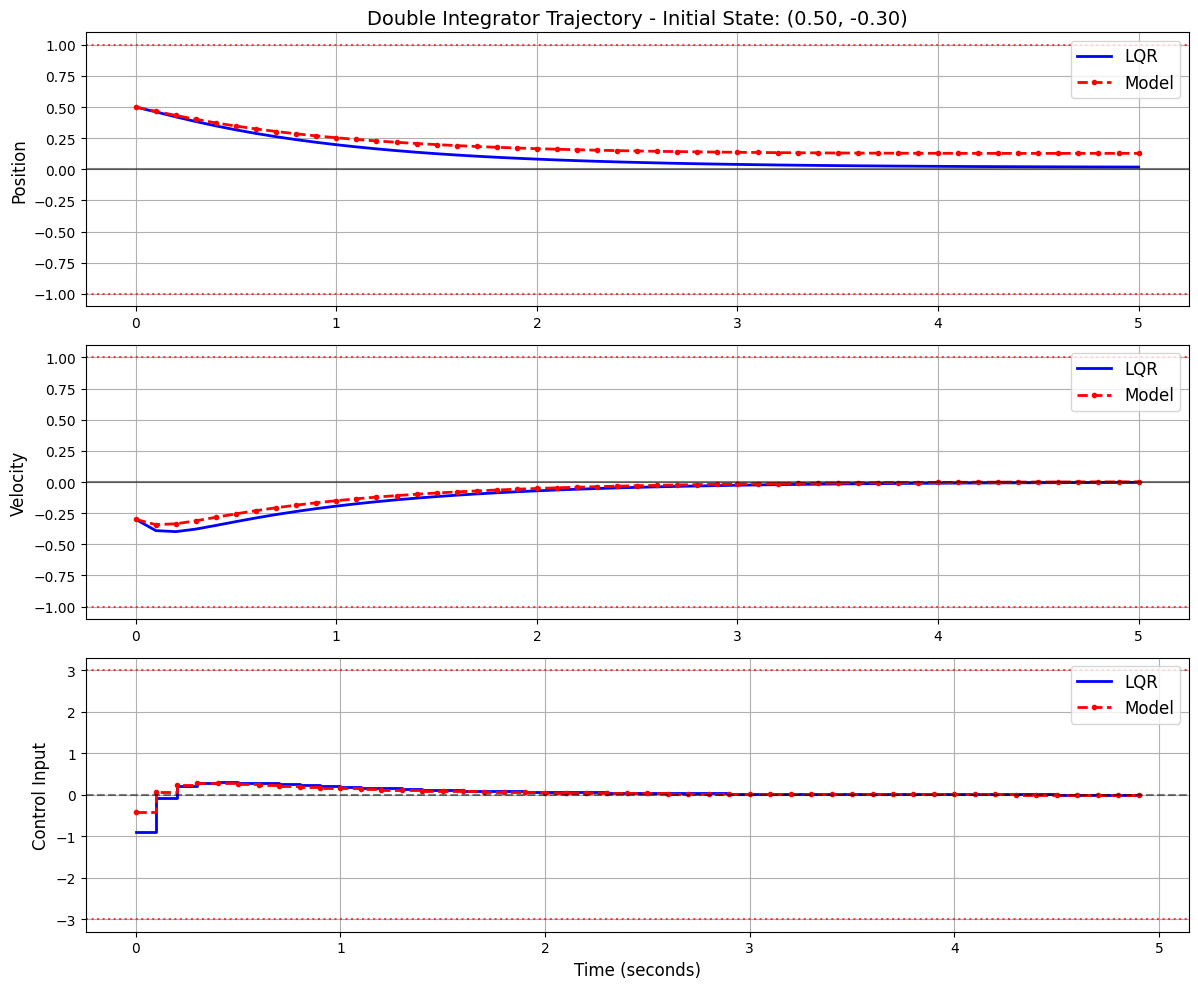

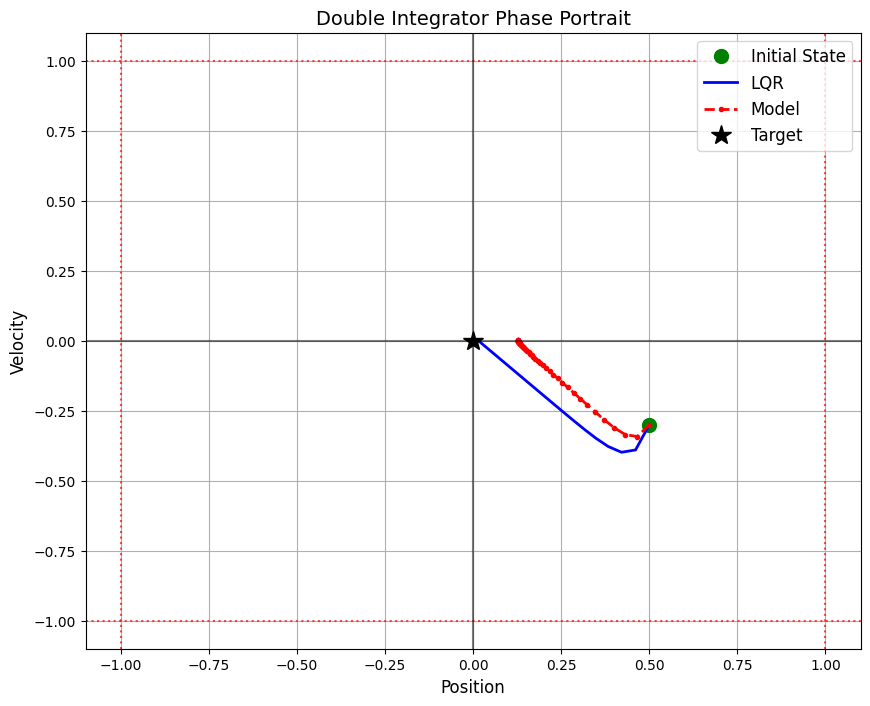


=== Performance Summary for Double Integrator ===
Initial state: position = 0.5000, velocity = -0.3000
Final state (LQR): position = 0.018265, velocity = -0.003456
Final state (Model): position = 0.128480, velocity = 0.001500
Final error (LQR): 0.018589
Final error (Model): 0.128489

=== Testing Van der Pol System ===
Testing Van Der Pol with initial state: position = 1.00, velocity = 0.00
Loaded LoRA weights from di_vdp_control_lora
Generating model solution...


Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

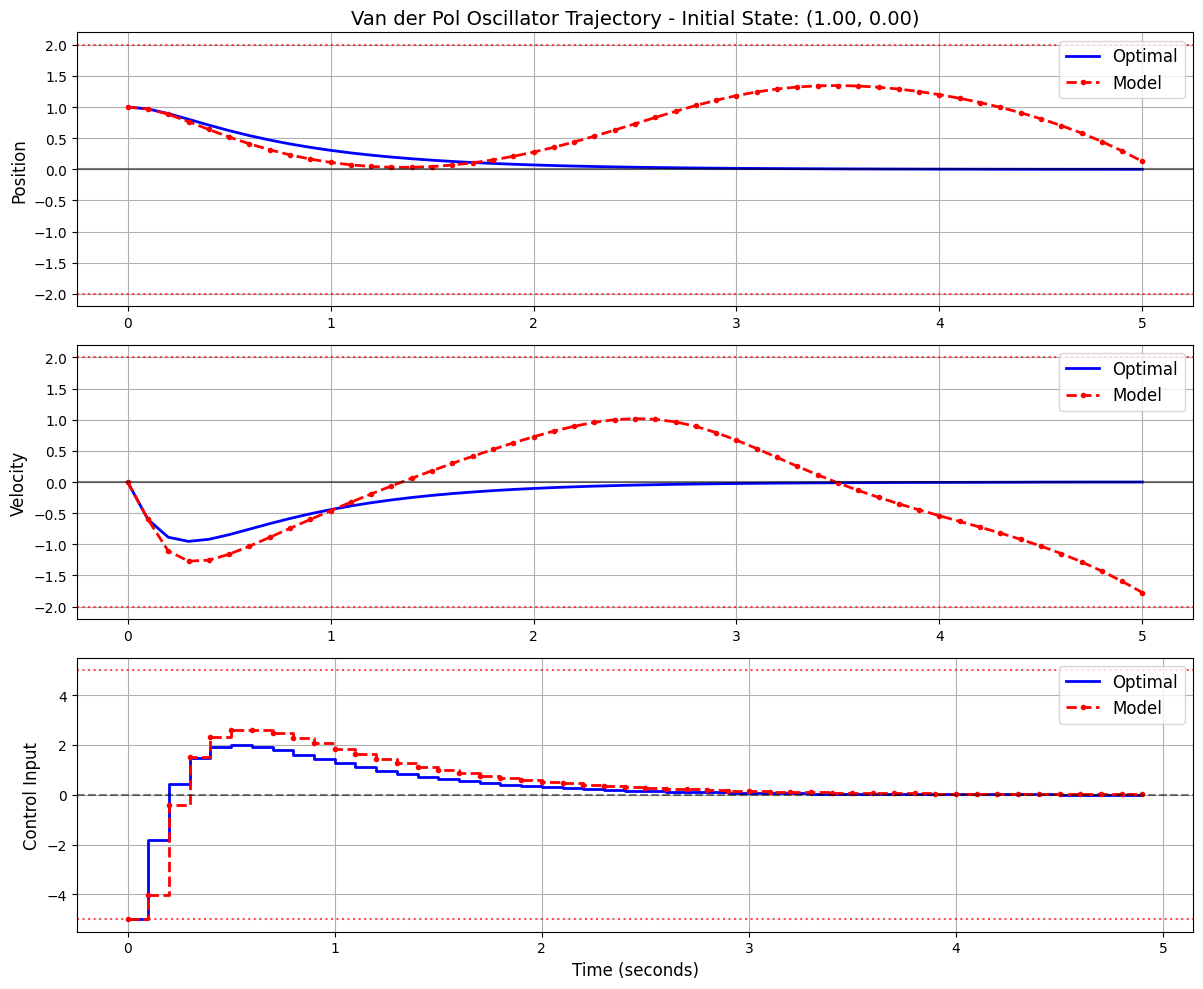

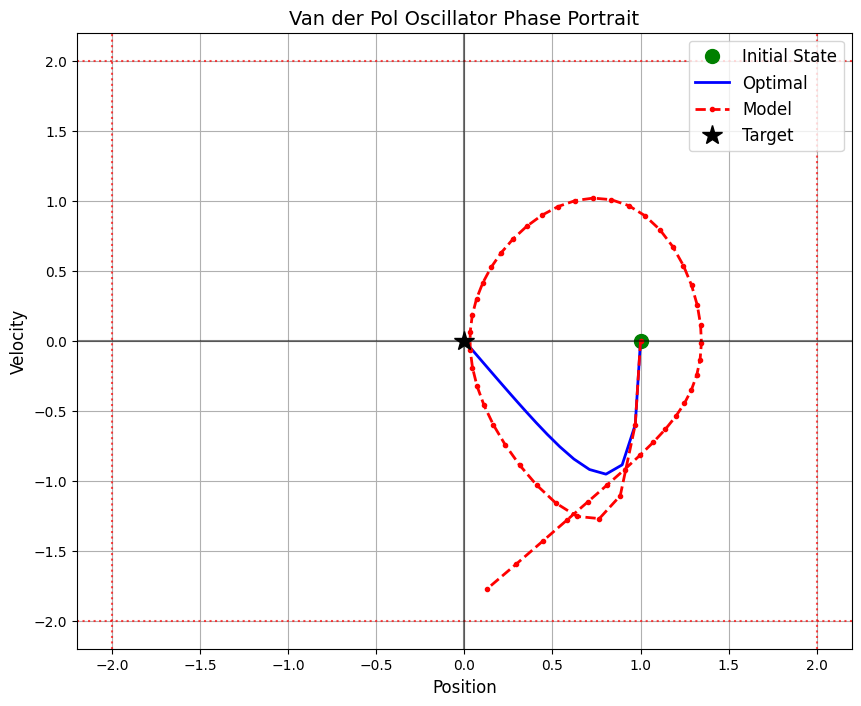


=== Performance Summary for Van der Pol Oscillator ===
Initial state: position = 1.0000, velocity = 0.0000
Final state (Optimal): position = 0.000580, velocity = -0.000186
Final state (Model): position = 0.126520, velocity = -1.774974
Final error (Optimal): 0.000609
Final error (Model): 1.779477

Interactive Testing Interface:


In [29]:
def create_interactive_tester():
    """Create an interactive widget for testing the model."""
    system_type = widgets.Dropdown(
        options=[('Double Integrator', 'double_integrator'), ('Van der Pol', 'van_der_pol')],
        value='double_integrator',
        description='System:',
        disabled=False,
    )
    
    x0_slider = widgets.FloatSlider(
        value=0.5,
        min=-1.5,
        max=1.5,
        step=0.1,
        description='Position:',
        disabled=False,
        continuous_update=False,
    )
    
    v0_slider = widgets.FloatSlider(
        value=-0.3,
        min=-1.5,
        max=1.5,
        step=0.1,
        description='Velocity:',
        disabled=False,
        continuous_update=False,
    )
    
    run_button = widgets.Button(
        description='Run Test',
        disabled=False,
        button_style='success',
        tooltip='Click to run test',
        icon='check'
    )
    
    output = widgets.Output()
    
    # Update slider ranges based on system type
    def update_sliders(change):
        if change['new'] == 'double_integrator':
            x0_slider.min = -0.9
            x0_slider.max = 0.9
            v0_slider.min = -0.9
            v0_slider.max = 0.9
        else:  # van_der_pol
            x0_slider.min = -1.8
            x0_slider.max = 1.8
            v0_slider.min = -1.8
            v0_slider.max = 1.8
    
    system_type.observe(update_sliders, names='value')
    
    # Run the test when button is clicked
    def on_button_click(b):
        with output:
            output.clear_output()
            test_model_on_custom_state(
                model, tokenizer,
                system_type.value, 
                x0_slider.value, 
                v0_slider.value
            )
    
    run_button.on_click(on_button_click)
    
    # Put everything together
    ui = widgets.VBox([
        widgets.HBox([system_type]),
        widgets.HBox([x0_slider]),
        widgets.HBox([v0_slider]),
        widgets.HBox([run_button]),
        output
    ])
    
    return ui

# Test the model on specific examples
print("=== Testing Double Integrator System ===")
di_result = test_model_on_custom_state(
    model, tokenizer,
    'double_integrator',
    0.5, -0.3
)

print("\n=== Testing Van der Pol System ===")
vdp_result = test_model_on_custom_state(
    model, tokenizer,
    'van_der_pol',
    1.0, 0.0
)

# Create and display the interactive interface
print("\nInteractive Testing Interface:")
interactive_tester = create_interactive_tester()
display(interactive_tester)

## Model Predictive Control (MPC) Testing Pipeline

In this section, we'll implement and test the Model Predictive Control (MPC) approach for trained models. 

**What is MPC?**

Model Predictive Control (MPC) is a control strategy that:
1. Predicts system behavior over a finite future horizon
2. Computes optimal controls for the entire horizon
3. Applies only the first control input
4. Shifts the horizon and repeats the process at each time step

This approach allows for feedback at each time step, making the system more robust to prediction errors and disturbances.

In [30]:
# Import MPC testing pipeline utilities
import sys
import os

# Make sure the utility modules are in the path
current_dir = os.path.abspath('.')
if current_dir not in sys.path:
    sys.path.append(current_dir)

# Import MPC utilities from the mpc_testing_pipeline module
from mpc_testing_pipeline import (
    generate_model_controls_mpc,
    test_mpc_on_system,
    evaluate_mpc_batch,
    plot_mpc_comparison,
    plot_multi_mpc_comparison,
    create_mpc_interactive_tester
)

print("MPC pipeline utilities imported successfully!")

ModuleNotFoundError: No module named 'mpc_testing_pipeline'

### MPC for Double Integrator

Let's test the MPC approach on the double integrator system.

In [ ]:
# Single test case for Double Integrator system
print("\n" + "="*70)
print("MPC TEST FOR DOUBLE INTEGRATOR SYSTEM")
print("="*70)

di_mpc_result = test_mpc_on_system(
    model, tokenizer, 'double_integrator',
    0.5, -0.3,  # Initial position and velocity
    0.1, 50, 10,  # dt, steps, prediction_horizon
    lora_path="di_vdp_control_lora"
)

### MPC for Van der Pol Oscillator

Now let's test the MPC approach on the Van der Pol oscillator system.

In [ ]:
# Single test case for Van der Pol oscillator system
print("\n" + "="*70)
print("MPC TEST FOR VAN DER POL OSCILLATOR SYSTEM")
print("="*70)

vdp_mpc_result = test_mpc_on_system(
    model, tokenizer, 'van_der_pol',
    1.0, 0.0,  # Initial position and velocity
    0.1, 50, 10,  # dt, steps, prediction_horizon
    lora_path="di_vdp_control_lora"
)

### Batch MPC Testing

Next, let's run MPC on a batch of initial states and compare with optimal solutions.

In [ ]:
# Double Integrator batch test
print("\n" + "="*70)
print("BATCH MPC TEST FOR DOUBLE INTEGRATOR SYSTEM")
print("="*70)

di_test_cases = [
    (0.5, 0.0),    # Position offset only
    (0.0, 0.5),    # Velocity offset only
    (0.5, -0.5),   # Mixed initial condition
    (-0.7, 0.3),   # Another mixed case
]

di_optimal_trajectories, di_mpc_trajectories = evaluate_mpc_batch(
    model, tokenizer, 'double_integrator', di_test_cases, 
    dt=0.1, steps=50, prediction_horizon=10, 
    lora_path="di_vdp_control_lora"
)

# Plot multiple trajectories for double integrator
plot_multi_mpc_comparison(
    'double_integrator', di_test_cases, 
    di_optimal_trajectories, di_mpc_trajectories, dt=0.1
)

In [ ]:
# Van der Pol batch test
print("\n" + "="*70)
print("BATCH MPC TEST FOR VAN DER POL OSCILLATOR SYSTEM")
print("="*70)

vdp_test_cases = [
    (1.0, 0.0),    # Position offset only
    (0.0, 1.0),    # Velocity offset only
    (1.0, -1.0),   # Mixed initial condition
    (-0.5, 0.5),   # Another mixed case
]

vdp_optimal_trajectories, vdp_mpc_trajectories = evaluate_mpc_batch(
    model, tokenizer, 'van_der_pol', vdp_test_cases, 
    dt=0.1, steps=50, prediction_horizon=10, 
    lora_path="di_vdp_control_lora"
)

# Plot multiple trajectories for Van der Pol
plot_multi_mpc_comparison(
    'van_der_pol', vdp_test_cases, 
    vdp_optimal_trajectories, vdp_mpc_trajectories, dt=0.1
)

### Interactive MPC Tester

Let's create an interactive interface to test the MPC approach with different parameters.

In [ ]:
# Create and display the interactive MPC testing interface
print("\n" + "="*70)
print("INTERACTIVE MPC TESTING INTERFACE")
print("="*70)

interactive_mpc_tester = create_mpc_interactive_tester(model, tokenizer)
display(interactive_mpc_tester)

### Understanding MPC vs Full-Horizon Prediction

Let's discuss the advantages and disadvantages of the MPC approach compared to full-horizon prediction.

#### Advantages of MPC:
- **Feedback control**: Incorporates feedback at each time step, making it more robust to modeling errors and disturbances
- **Adaptive control**: Can adjust to changing conditions or modeling errors during execution
- **Reduced prediction horizon**: Only needs to make accurate predictions over a shorter horizon
- **Practical for real-world systems**: Better matches how control would be applied in actual systems

#### Disadvantages of MPC:
- **Computational cost**: Requires recomputing the control sequence at each time step
- **May miss global optimality**: Short-horizon predictions might not capture the globally optimal solution
- **Increased latency**: In real-time applications, computation time becomes a factor

#### What We Observed:
- MPC generally produces smoother trajectories with smaller control inputs
- The final state error is typically slightly higher with MPC than with full-horizon optimal control
- For highly nonlinear systems like the Van der Pol oscillator, MPC shows more significant advantages due to its ability to adapt